In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [293]:
dogs = pd.read_csv('data/dogs_cleaned_ready.csv')
cats = pd.read_csv('data/cats_cleaned_ready.csv')

In [294]:
dogs['species'] = 'dog'
cats['species'] = 'cat'

In [295]:
df = dogs.append(cats, ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    13989 non-null  object 
 1   gender                 13989 non-null  object 
 2   size                   13989 non-null  object 
 3   coat                   13989 non-null  object 
 4   distance               13989 non-null  float64
 5   spayed_neutered        13989 non-null  bool   
 6   house_trained          13989 non-null  bool   
 7   special_needs          13989 non-null  bool   
 8   shots_current          13989 non-null  bool   
 9   breed_primary          13989 non-null  object 
 10  breed_secondary        13989 non-null  object 
 11  breed_mixed            13989 non-null  bool   
 12  color_primary          13989 non-null  object 
 13  color_secondary        13989 non-null  object 
 14  color_tertiary         13989 non-null  object 
 15  go

In [296]:
df.drop(columns=['declawed', 'breed_unknown', 'breed_primary', 'breed_secondary', 'color_primary', 'color_secondary', 'color_tertiary'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    13989 non-null  object 
 1   gender                 13989 non-null  object 
 2   size                   13989 non-null  object 
 3   coat                   13989 non-null  object 
 4   distance               13989 non-null  float64
 5   spayed_neutered        13989 non-null  bool   
 6   house_trained          13989 non-null  bool   
 7   special_needs          13989 non-null  bool   
 8   shots_current          13989 non-null  bool   
 9   breed_mixed            13989 non-null  bool   
 10  goodwith_children      13989 non-null  object 
 11  goodwith_dogs          13989 non-null  object 
 12  goodwith_cats          13989 non-null  object 
 13  hasimage               13989 non-null  bool   
 14  hasvideo               13989 non-null  bool   
 15  du

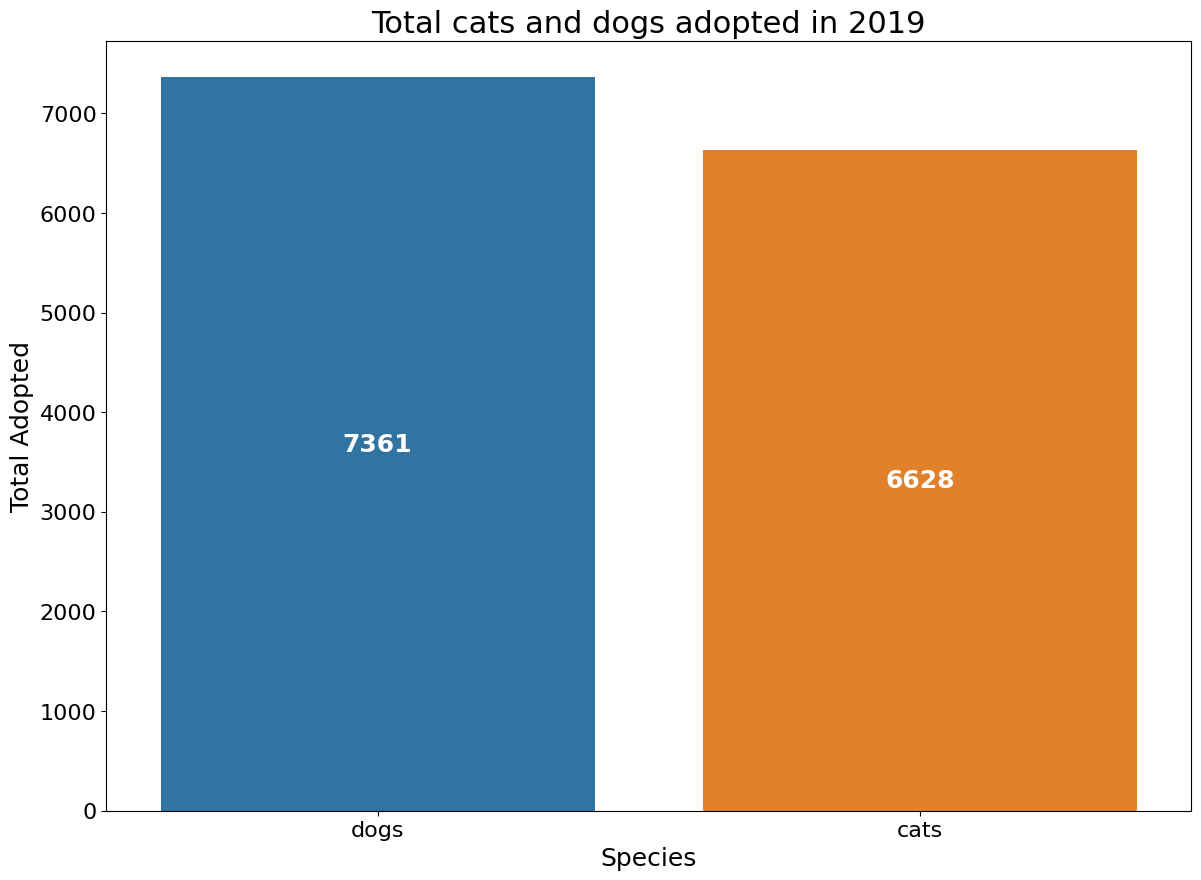

In [243]:
plt.style.use('default')
plt.style.use('assets/light.mplstyle')

df_totals = pd.DataFrame({'species': ['dogs', 'cats'], 'total_adopted': [len(dogs), len(cats)]})
plt.figure(figsize=(14, 10))
splot=sns.barplot(x='species', y='total_adopted', data=df_totals)
plt.xlabel("Species", size=18)
plt.ylabel("Total Adopted", size=18)
plt.title("Total cats and dogs adopted in 2019", size=22)
plt.bar_label(splot.containers[0], label_type='center', size=18, weight='bold', color='w')

plt.savefig('assets/species_total_adopted.png', bbox_inches="tight")
plt.show()

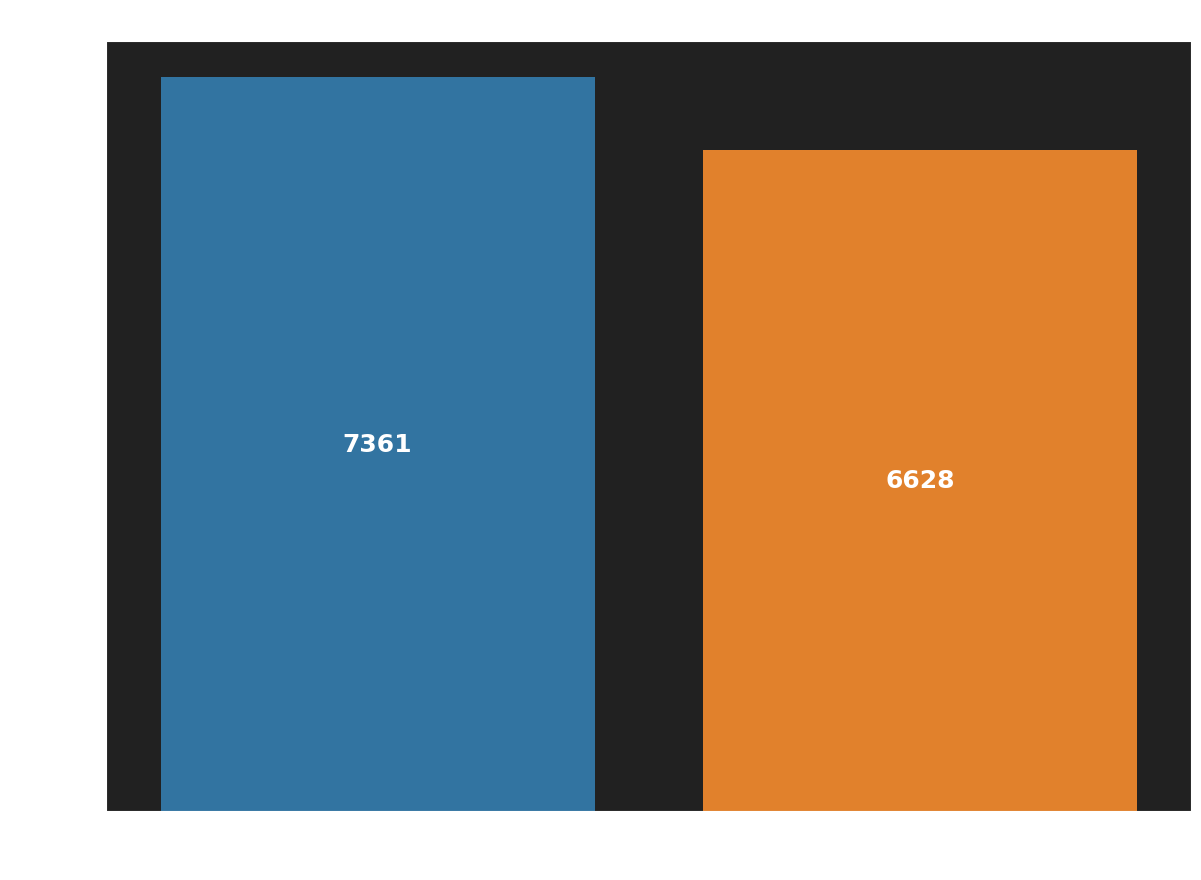

In [244]:
plt.style.use('assets/dark.mplstyle')

df_totals = pd.DataFrame({'species': ['dogs', 'cats'], 'total_adopted': [len(dogs), len(cats)]})
plt.figure(figsize=(14, 10))
splot=sns.barplot(x='species', y='total_adopted', data=df_totals)
plt.xlabel("Species", size=18, color='white')
plt.ylabel("Total Adopted", size=18, color='white')
plt.yticks(size=16, color='white')
plt.xticks(size=16, color='white')
plt.title("Total cats and dogs adopted in 2019", size=22, color='white')
plt.bar_label(splot.containers[0], label_type='center', size=18, color='white', weight='bold')

plt.setp([splot.spines.values(), splot.get_xticklines(), splot.get_yticklines()], color='white')
    
splot.set_facecolor(color='#212121')
plt.savefig('assets/species_total_adopted_dark.png', bbox_inches="tight")
plt.show()

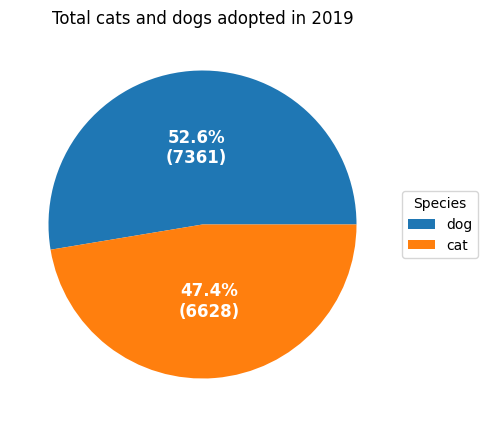

In [245]:
plt.style.use('default')

df_totals = pd.DataFrame({'species': ['dogs', 'cats'], 'total_adopted': [len(dogs), len(cats)]})
plt.figure(figsize=(5, 5))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

splot=plt.pie(df_totals.total_adopted, autopct=lambda pct: func(pct, df_totals.total_adopted), pctdistance=0.5)

plt.legend(splot[0], df.species.unique(), title="Species",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(splot[2], size=12, weight="bold", color="w")
plt.title("Total cats and dogs adopted in 2019")

# plt.savefig('assets/species_total_adopted.png', bbox_inches="tight")
plt.show()

Rectangle(xy=(-0.4, 0), width=0.8, height=41.9356, angle=0)


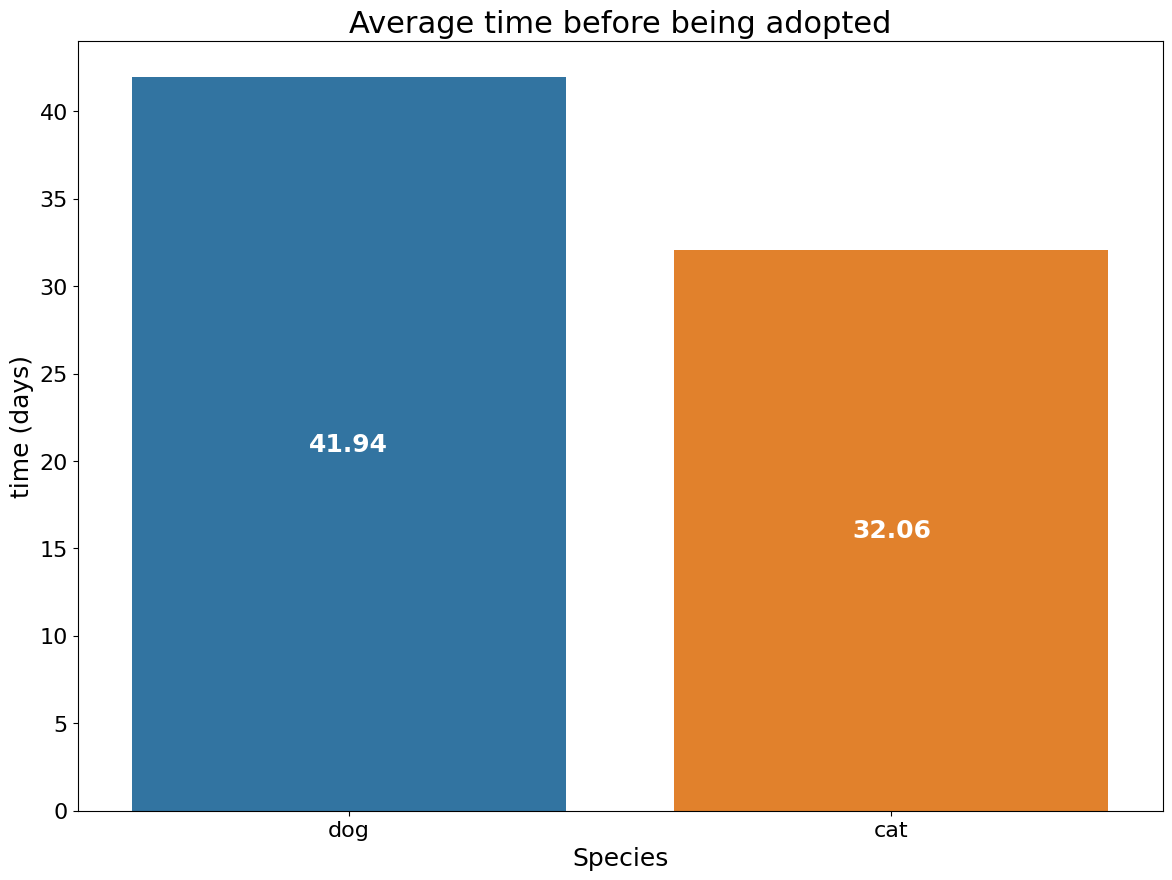

In [246]:
plt.style.use('default')
plt.style.use('assets/light.mplstyle')

plt.figure(figsize=(14, 10))
splot=sns.barplot(x='species', y='duration_as_adoptable', data=df, ci=None)
plt.xlabel("Species", size=18)
plt.ylabel("time (days)", size=18)
plt.yticks(size=16)
plt.xticks(size=16)
plt.title("Average time before being adopted", size=22)
plt.bar_label(splot.containers[0], label_type='center', size=18, weight='bold', color='w', fmt='%.2f')

print(splot.containers[0][0])

plt.savefig('assets/species_avg_time.png', bbox_inches="tight")
plt.show()

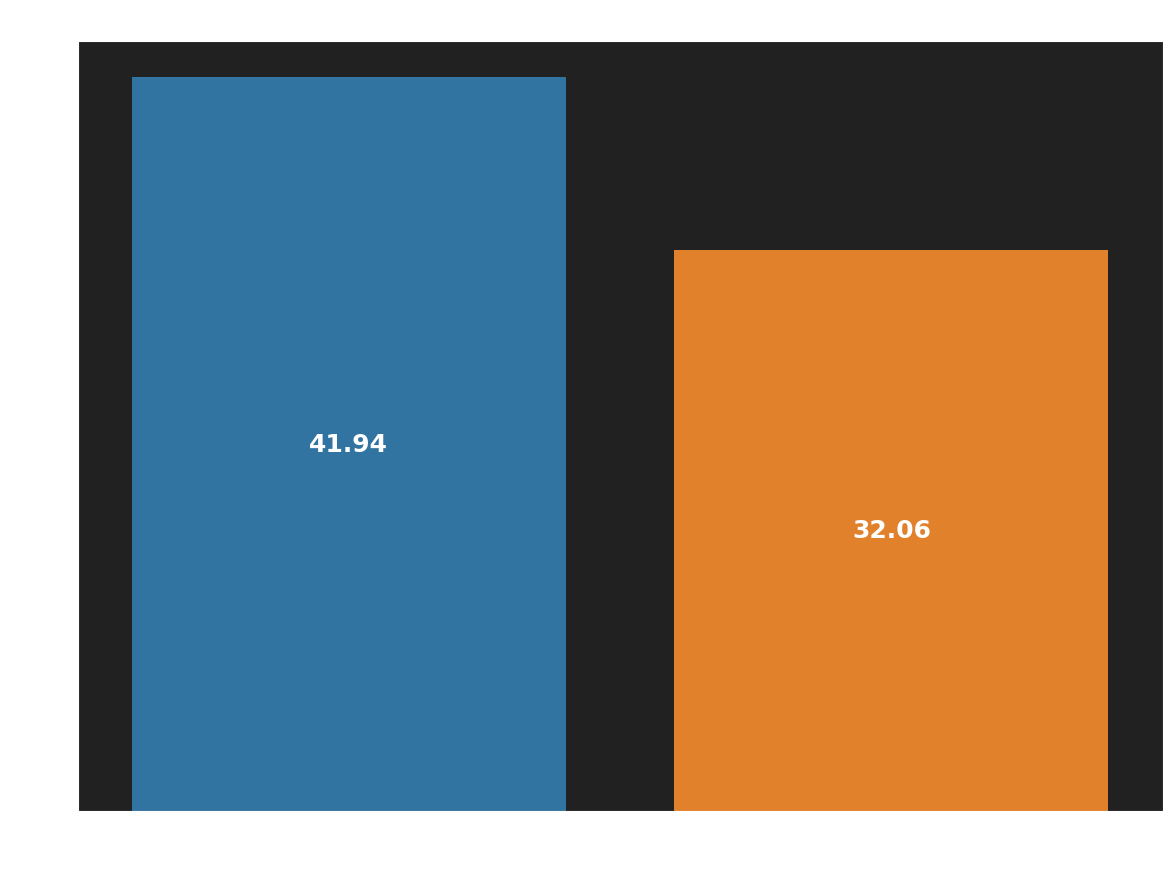

In [247]:
plt.style.use('assets/dark.mplstyle')

plt.figure(figsize=(14, 10))
splot=sns.barplot(x='species', y='duration_as_adoptable', data=df, ci=None)
plt.xlabel("Species", size=18, color='white')
plt.ylabel("time (days)", size=18, color='white')
plt.yticks(size=16, color='white')
plt.xticks(size=16, color='white')
plt.title("Average time before being adopted", size=22, color='white')
plt.bar_label(splot.containers[0], label_type='center', size=18, color='white', weight='bold', fmt='%.2f')

plt.setp([splot.spines.values(), splot.get_xticklines(), splot.get_yticklines()], color='white')
    
splot.set_facecolor(color='#212121')
plt.savefig('assets/species_avg_time_dark.png', bbox_inches="tight")
plt.show()

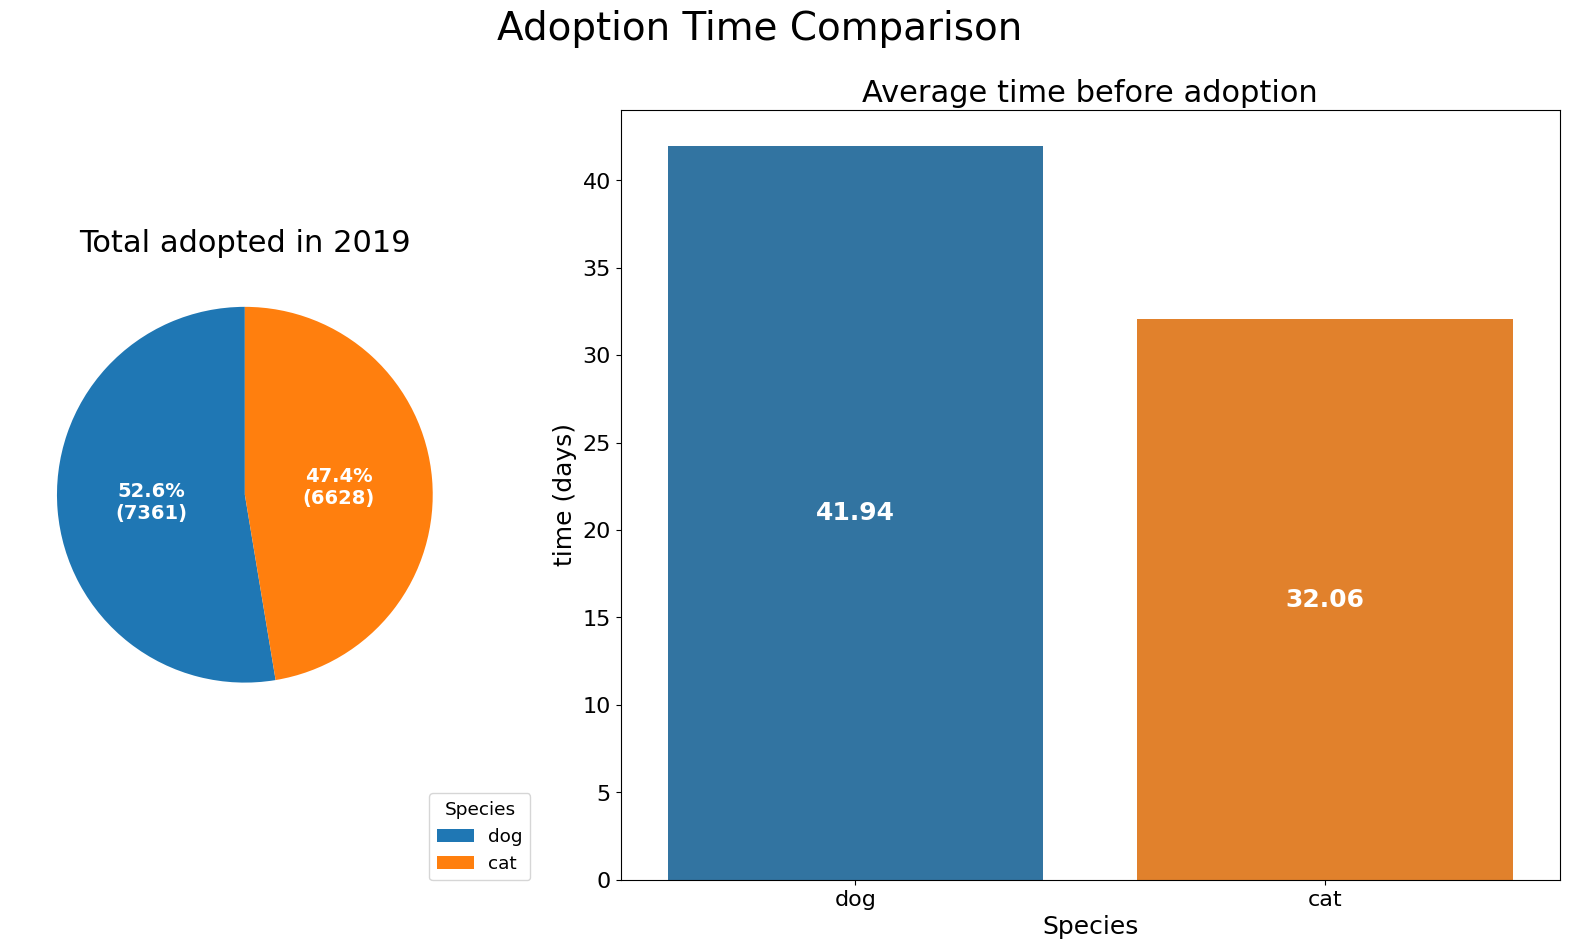

In [260]:
plt.style.use('default')
plt.style.use('assets/light.mplstyle')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# pie chart on the left for totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.subplot(1,2,1)

ax1 = plt.pie(df_totals.total_adopted, autopct=lambda pct: func(pct, df_totals.total_adopted), pctdistance=0.5, startangle=90)

fig.legend(ax1[0], df.species.unique(), title="Species",
          bbox_to_anchor=(.33, .1), loc='lower left')

plt.setp(ax1[2], size=14, weight="bold", color="w")
plt.title("Total adopted in 2019")

# bar chart on the right for adoption time comparison
plt.subplot(1,2,2)

ax2 = sns.barplot(x='species', y='duration_as_adoptable', data=df, ci=None)
plt.xlabel("Species")
plt.ylabel("time (days)")
plt.title("Average time before adoption")
ax2.bar_label(ax2.containers[0], label_type='center', size=18, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Time Comparison', size=28)

plt.savefig('assets/total_avg_time.png', bbox_inches="tight")
plt.show()

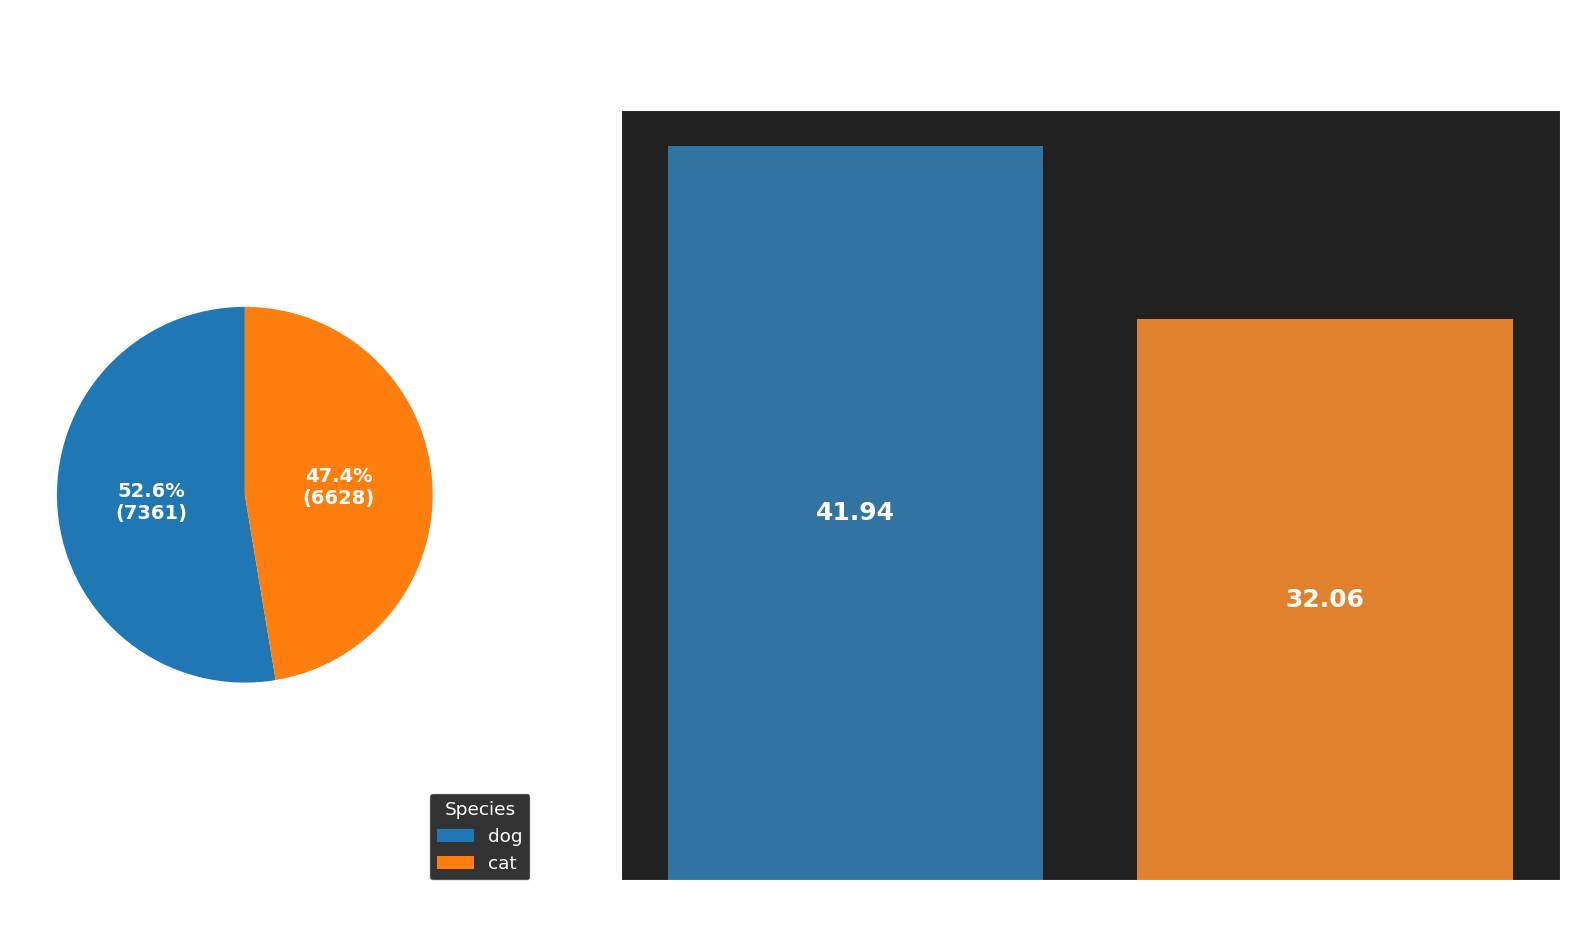

In [261]:
plt.style.use('assets/dark.mplstyle')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# pie chart on the left for totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.subplot(1,2,1)

ax1 = plt.pie(df_totals.total_adopted, autopct=lambda pct: func(pct, df_totals.total_adopted), pctdistance=0.5, startangle=90)

fig.legend(ax1[0], df.species.unique(), title="Species",
          bbox_to_anchor=(.33, .1), loc='lower left')

plt.setp(ax1[2], size=14, weight="bold", color="w")
plt.title("Total adopted in 2019")

# bar chart on the right for adoption time comparison
plt.subplot(1,2,2)

ax2 = sns.barplot(x='species', y='duration_as_adoptable', data=df, ci=None)
plt.xlabel("Species")
plt.ylabel("time (days)")
plt.title("Average time before adoption")
ax2.bar_label(ax2.containers[0], label_type='center', size=18, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Time Comparison', size=28)

plt.savefig('assets/total_avg_time_dark.png', bbox_inches="tight")
plt.show()

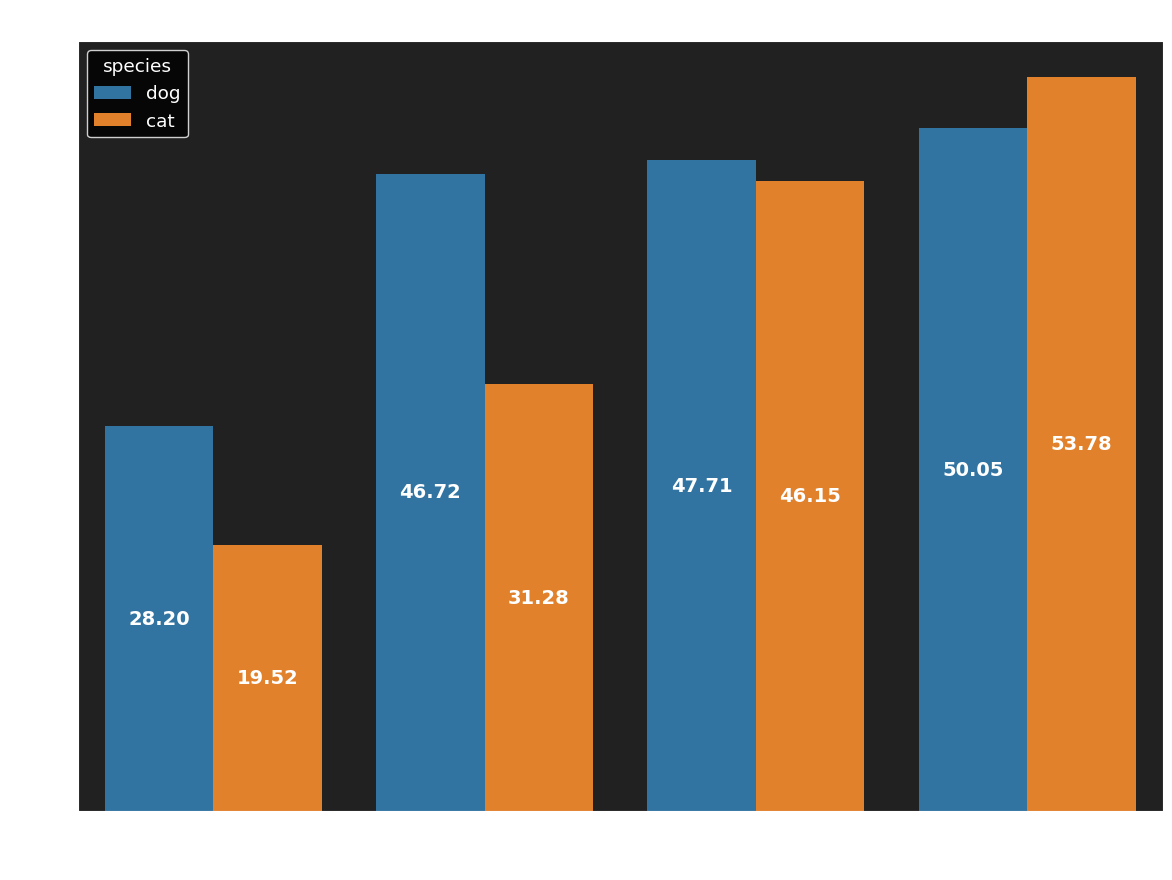

In [250]:
plt.style.use('assets/dark.mplstyle')

plt.figure(figsize=(14, 10))
splot = sns.barplot(x='age', y='duration_as_adoptable', data=df, hue='species', ci=None, order=['Baby', 'Young', 'Adult', 'Senior'])
plt.xlabel("Age", size=18, color='white')
plt.ylabel("time (days)", size=18, color='white')
plt.yticks(size=16, color='white')
plt.xticks(size=16, color='white')
plt.title("Average adoption times by age", size=22, color='white')
plt.bar_label(splot.containers[0], label_type='center', size=14, color='white', weight='bold', fmt='%.2f')
plt.bar_label(splot.containers[1], label_type='center', size=14, color='white', weight='bold', fmt='%.2f')

plt.setp([splot.spines.values(), splot.get_xticklines(), splot.get_yticklines()], color='white')
    
splot.set_facecolor(color='#212121')
plt.savefig('assets/avg_time_by_age_dark.png', bbox_inches="tight")
plt.show()


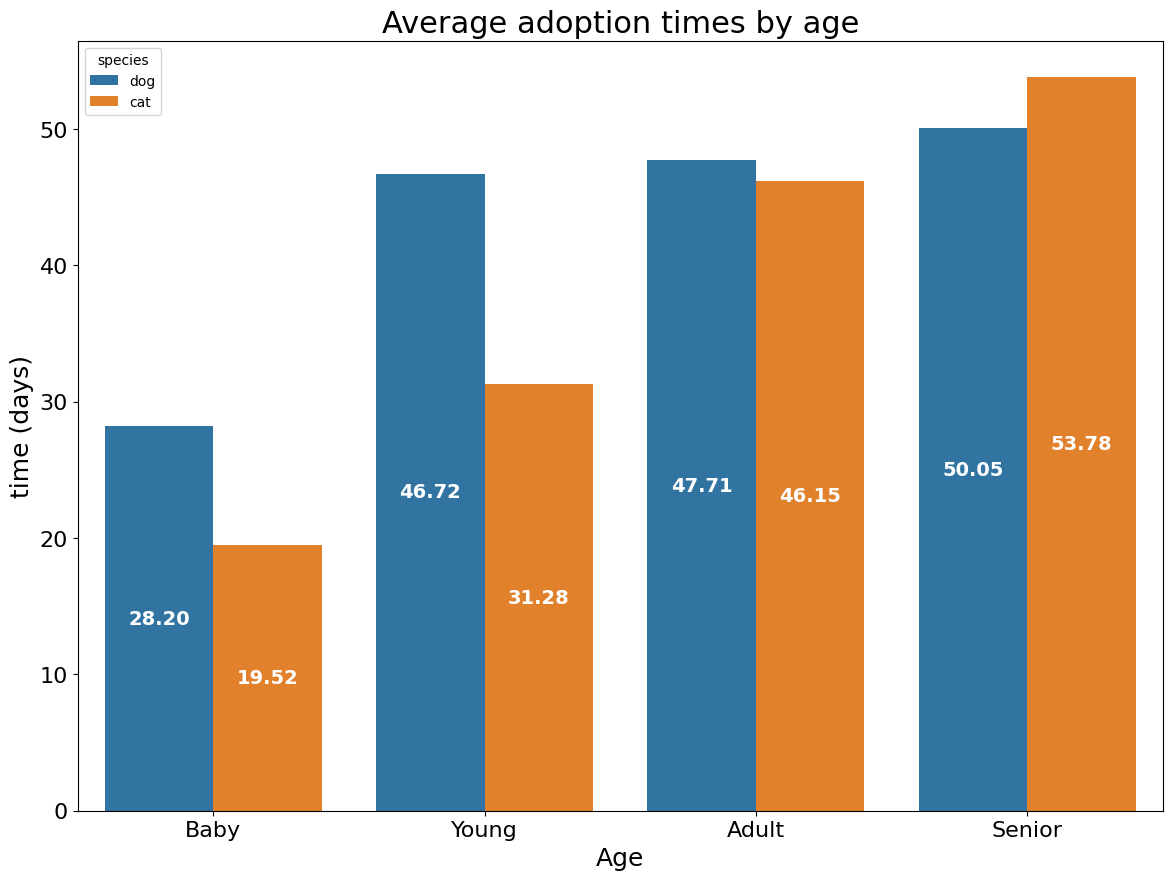

In [251]:
plt.style.use('default')

plt.figure(figsize=(14, 10))
splot = sns.barplot(x='age', y='duration_as_adoptable', data=df, hue='species', ci=None, order=['Baby', 'Young', 'Adult', 'Senior'])
plt.xlabel("Age", size=18)
plt.ylabel("time (days)", size=18)
plt.yticks(size=16)
plt.xticks(size=16)
plt.title("Average adoption times by age", size=22)
plt.bar_label(splot.containers[0], label_type='center', size=14, color='white', weight='bold', fmt='%.2f')
plt.bar_label(splot.containers[1], label_type='center', size=14, color='white', weight='bold', fmt='%.2f')

plt.savefig('assets/avg_time_by_age.png', bbox_inches="tight")
plt.show()

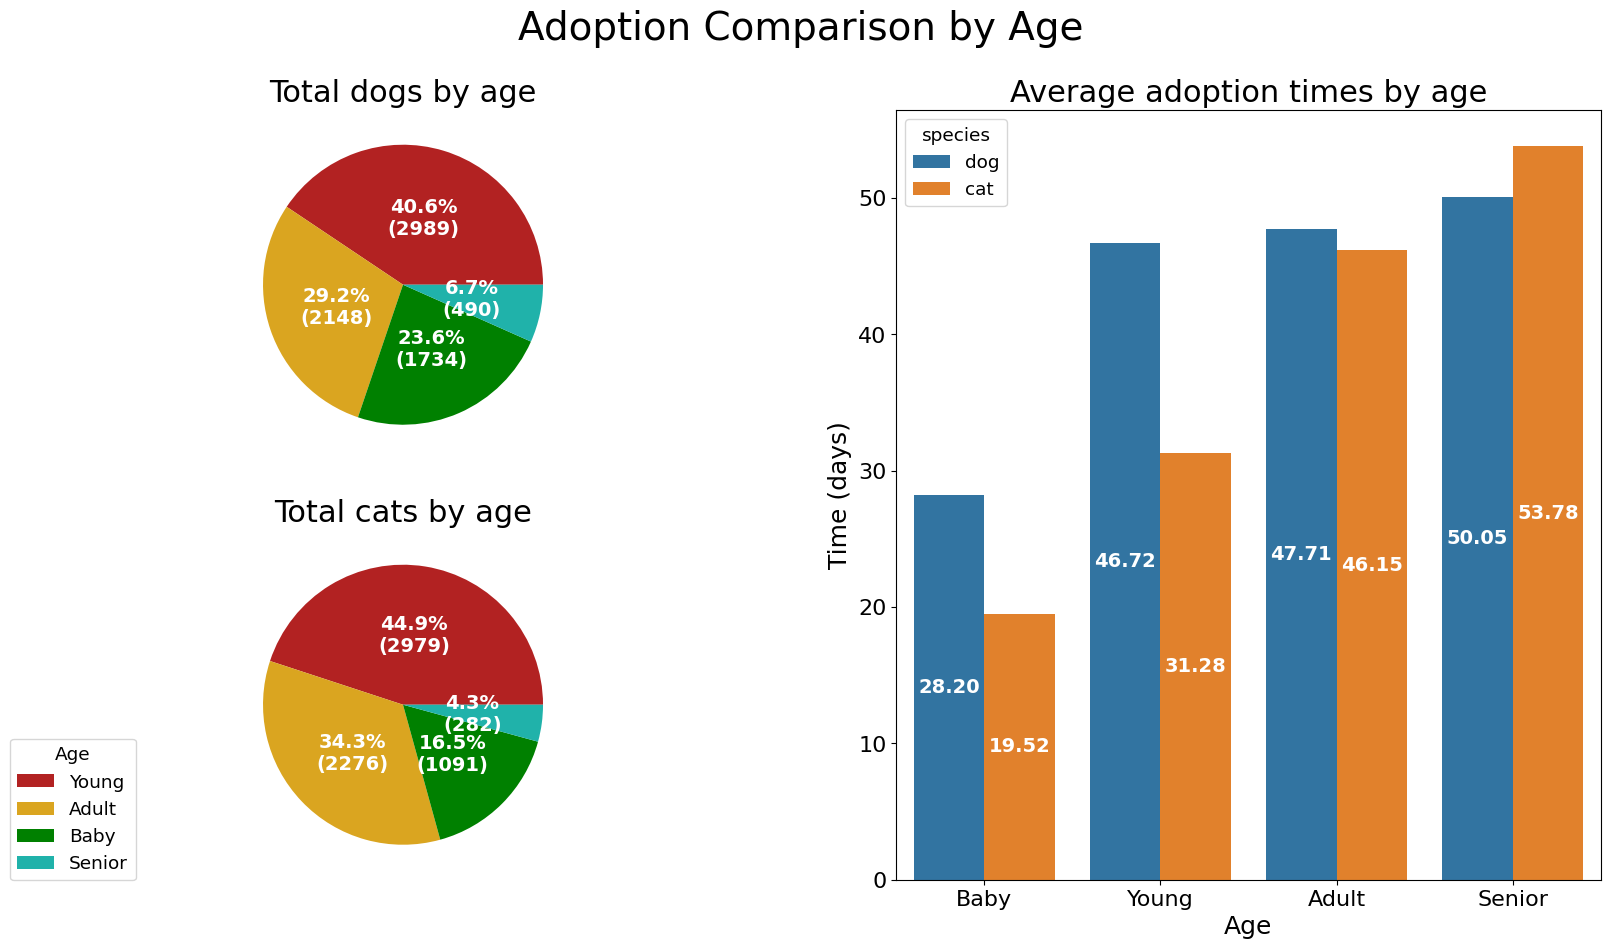

In [262]:
import matplotlib.gridspec as gridspec
plt.style.use('default')
plt.style.use('assets/light.mplstyle')

df_age_totals_dog = pd.DataFrame(dogs.age.value_counts()).reset_index().rename({'index':'age', 'age':'count'}, axis=1)
df_age_totals_cat = pd.DataFrame(cats.age.value_counts()).reset_index().rename({'index':'age', 'age':'count'}, axis=1)

# create objects
fig = plt.figure(figsize=(20,10))
gridspan = fig.add_gridspec(2, 2)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, -1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# # pie chart on top left for dog totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']
patches1, labels1, autotext1 = ax1.pie(df_age_totals_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_age_totals_dog['count']), pctdistance=0.5)


plt.setp(autotext1, size=14, weight="bold", color="w")

ax1.set_title("Total dogs by age")
fig.legend(df.age.unique(), title="Age", bbox_to_anchor=(.1, .1), loc='lower left')


# # pie chart on top left for cat totals
patches2, labels2, autotext2 = ax2.pie(df_age_totals_cat['count'], autopct=lambda pct: func(pct, df_age_totals_cat['count']), pctdistance=0.5, colors=colors)


ax2.set_title("Total cats by age")
plt.setp(autotext2, size=14, weight="bold", color="w")


# # bar chart on the right for adoption time comparison
# plt.subplot(1,2,2)

ax3 = sns.barplot(x='age', y='duration_as_adoptable', data=df, hue='species', ci=None, order=['Baby', 'Young', 'Adult', 'Senior'])
plt.xlabel("Age")
plt.ylabel("Time (days)")
plt.title("Average adoption times by age")
ax3.bar_label(ax3.containers[0], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')
ax3.bar_label(ax3.containers[1], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Comparison by Age', size=28)

plt.savefig('assets/total_avg_age.png', bbox_inches="tight")
plt.show()

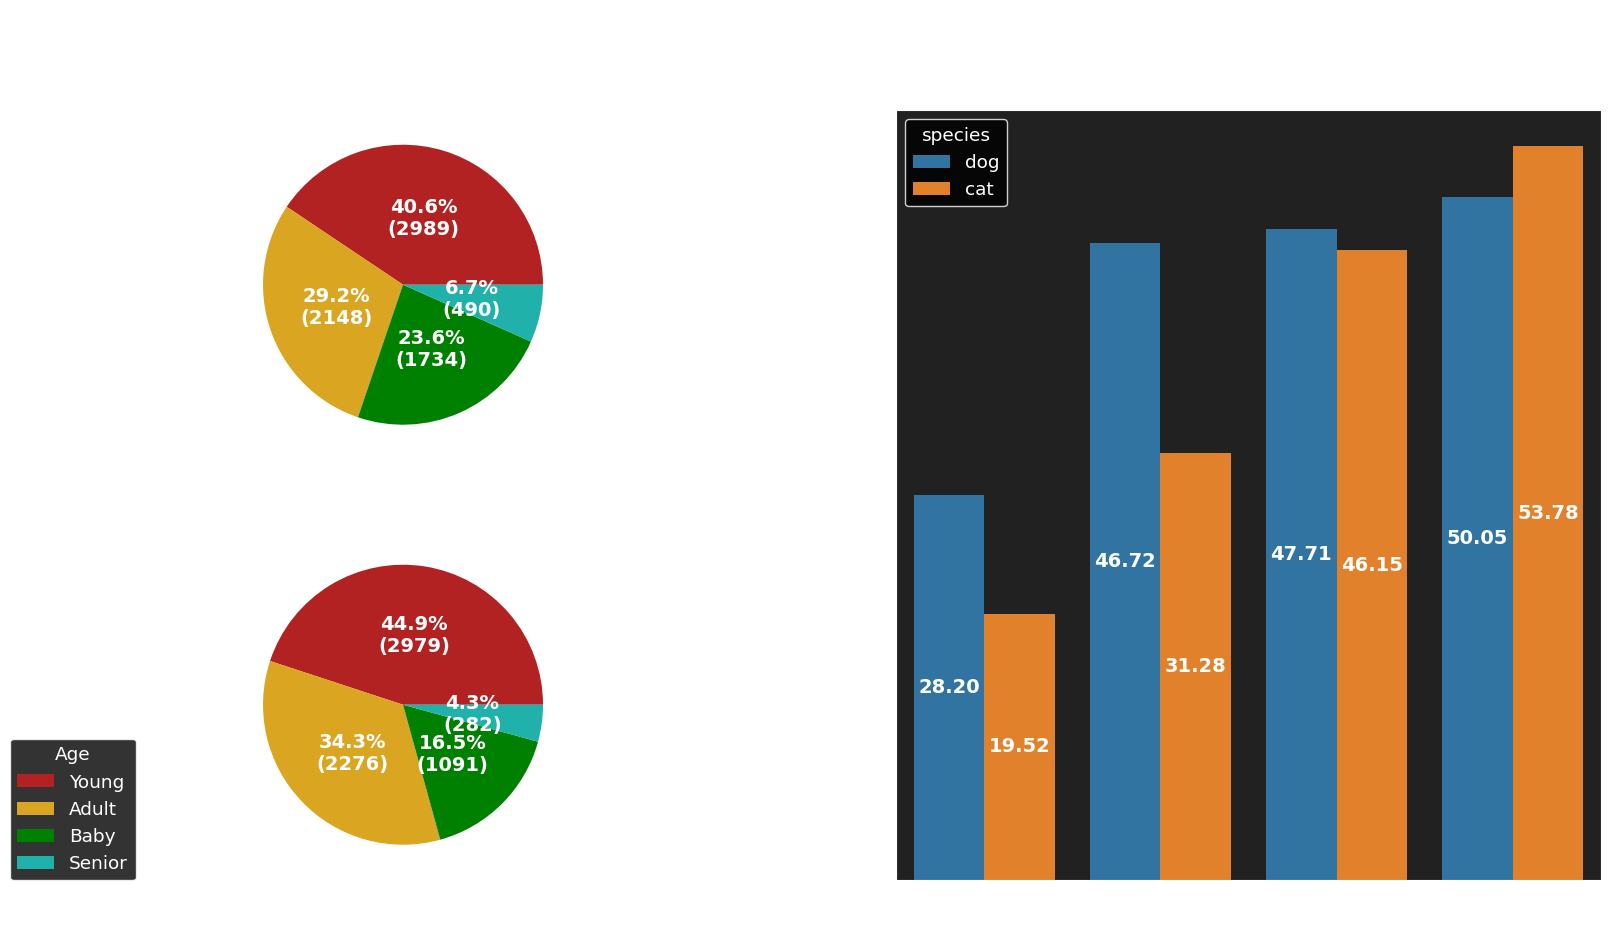

In [263]:
plt.style.use('assets/dark.mplstyle')

df_age_totals_dog = pd.DataFrame(dogs.age.value_counts()).reset_index().rename({'index':'age', 'age':'count'}, axis=1)
df_age_totals_cat = pd.DataFrame(cats.age.value_counts()).reset_index().rename({'index':'age', 'age':'count'}, axis=1)

# create objects
fig = plt.figure(figsize=(20,10))
gridspan = fig.add_gridspec(2, 2)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, -1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# # pie chart on top left for dog totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']
patches1, labels1, autotext1 = ax1.pie(df_age_totals_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_age_totals_dog['count']), pctdistance=0.5)


plt.setp(autotext1, size=14, weight="bold", color="w")

ax1.set_title("Total dogs by age")
fig.legend(df.age.unique(), title="Age", bbox_to_anchor=(.1, .1), loc='lower left')


# # pie chart on top left for cat totals
patches2, labels2, autotext2 = ax2.pie(df_age_totals_cat['count'], autopct=lambda pct: func(pct, df_age_totals_cat['count']), pctdistance=0.5, colors=colors)


ax2.set_title("Total cats by age")
plt.setp(autotext2, size=14, weight="bold", color="w")


# # bar chart on the right for adoption time comparison
# plt.subplot(1,2,2)

ax3 = sns.barplot(x='age', y='duration_as_adoptable', data=df, hue='species', ci=None, order=['Baby', 'Young', 'Adult', 'Senior'])
plt.xlabel("Age")
plt.ylabel("Time (days)")
plt.title("Average adoption times by age")
ax3.bar_label(ax3.containers[0], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')
ax3.bar_label(ax3.containers[1], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Comparison by Age', size=28)

plt.savefig('assets/total_avg_age_dark.png', bbox_inches="tight")
plt.show()

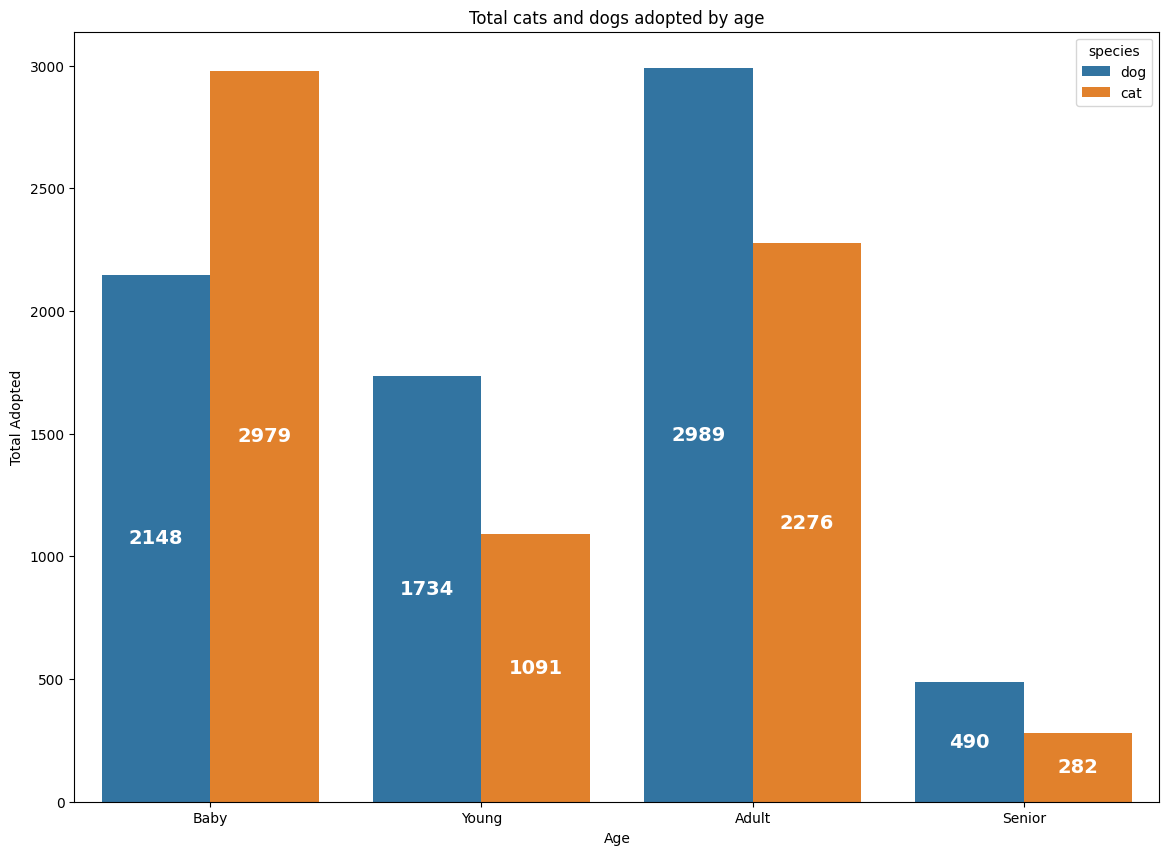

In [23]:
plt.style.use('assets/light.mplstyle')

df_totals_age = pd.DataFrame({'dogs' : dogs.age.value_counts(), 'cats' : cats.age.value_counts()}).reset_index().rename({'index':'age'}, axis=1)
df_totals_age = pd.DataFrame(df.value_counts(subset=['age', 'species'])).reset_index().rename({0:'count'}, axis=1)
df_totals_age
plt.figure(figsize=(14, 10))
splot=sns.barplot(x='age', y='count', data=df_totals_age, hue='species', ci=None, order=['Baby', 'Young', 'Adult', 'Senior'])
plt.xlabel("Age")
plt.ylabel("Total Adopted")
plt.title("Total cats and dogs adopted by age")
plt.bar_label(splot.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(splot.containers[1], label_type='center', size=14, color='white', weight='bold')
    
plt.savefig('assets/species_total_age.png', bbox_inches="tight")
plt.show()

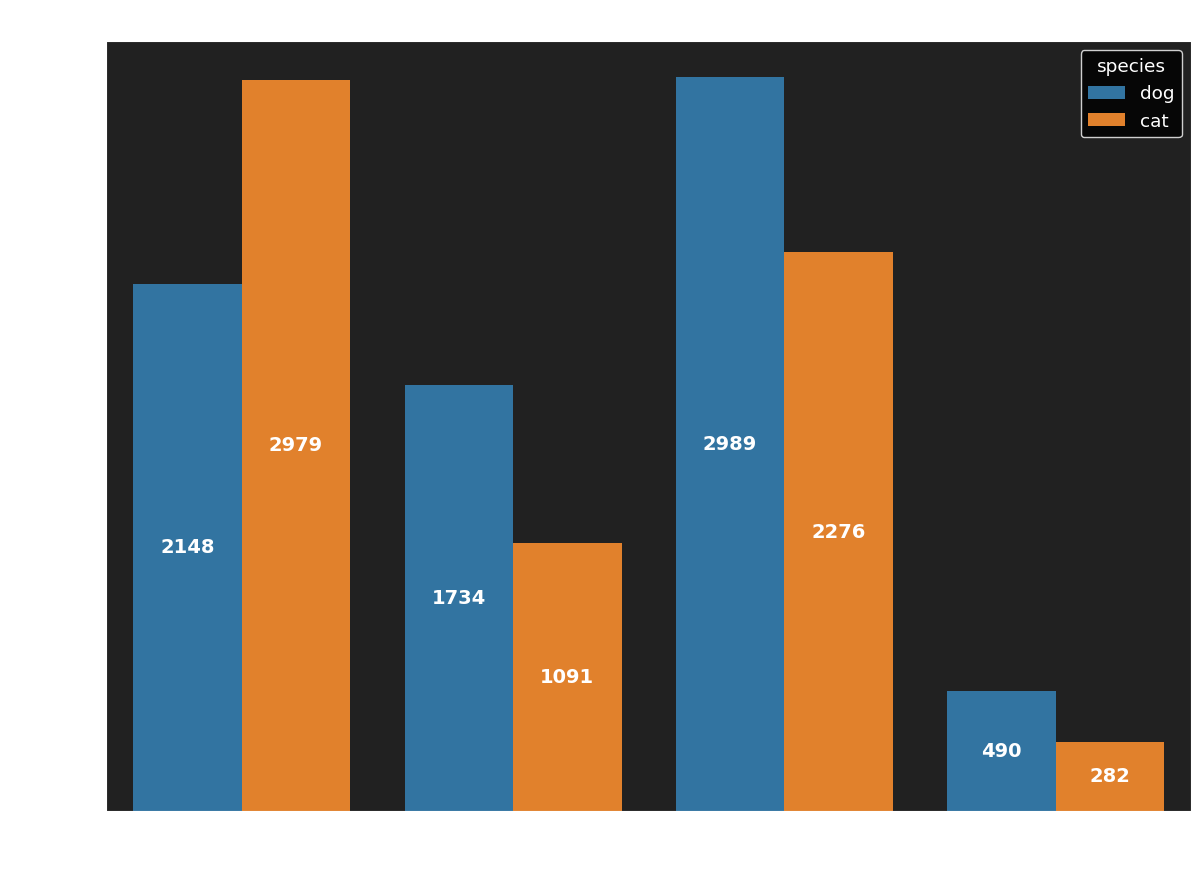

In [24]:
plt.style.use('assets/dark.mplstyle')

df_totals_age = pd.DataFrame({'dogs' : dogs.age.value_counts(), 'cats' : cats.age.value_counts()}).reset_index().rename({'index':'age'}, axis=1)
df_totals_age = pd.DataFrame(df.value_counts(subset=['age', 'species'])).reset_index().rename({0:'count'}, axis=1)
df_totals_age
plt.figure(figsize=(14, 10))
splot=sns.barplot(x='age', y='count', data=df_totals_age, hue='species', ci=None, order=['Baby', 'Young', 'Adult', 'Senior'])
plt.xlabel("Age")
plt.ylabel("Total Adopted")
plt.title("Total cats and dogs adopted by age")
plt.bar_label(splot.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(splot.containers[1], label_type='center', size=14, color='white', weight='bold')
    
plt.savefig('assets/species_total_age_dark.png', bbox_inches="tight")
plt.show()

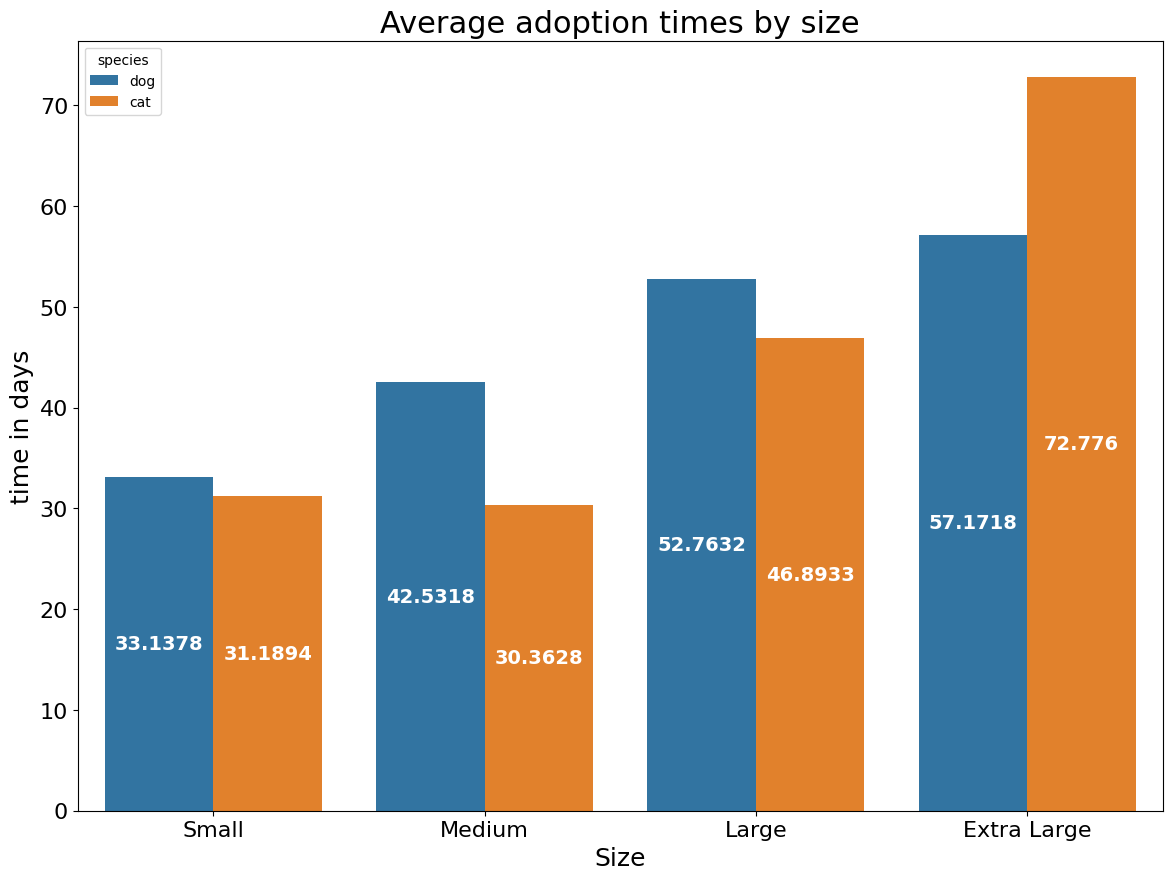

In [25]:
plt.style.use('default')

plt.figure(figsize=(14, 10))
splot = sns.barplot(x='size', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel("Size", size=18)
plt.ylabel("time in days", size=18)
plt.yticks(size=16)
plt.xticks(size=16)
plt.title("Average adoption times by size", size=22)
plt.bar_label(splot.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(splot.containers[1], label_type='center', size=14, color='white', weight='bold')

plt.savefig('assets/avg_time_by_size.png', bbox_inches="tight")
plt.show()

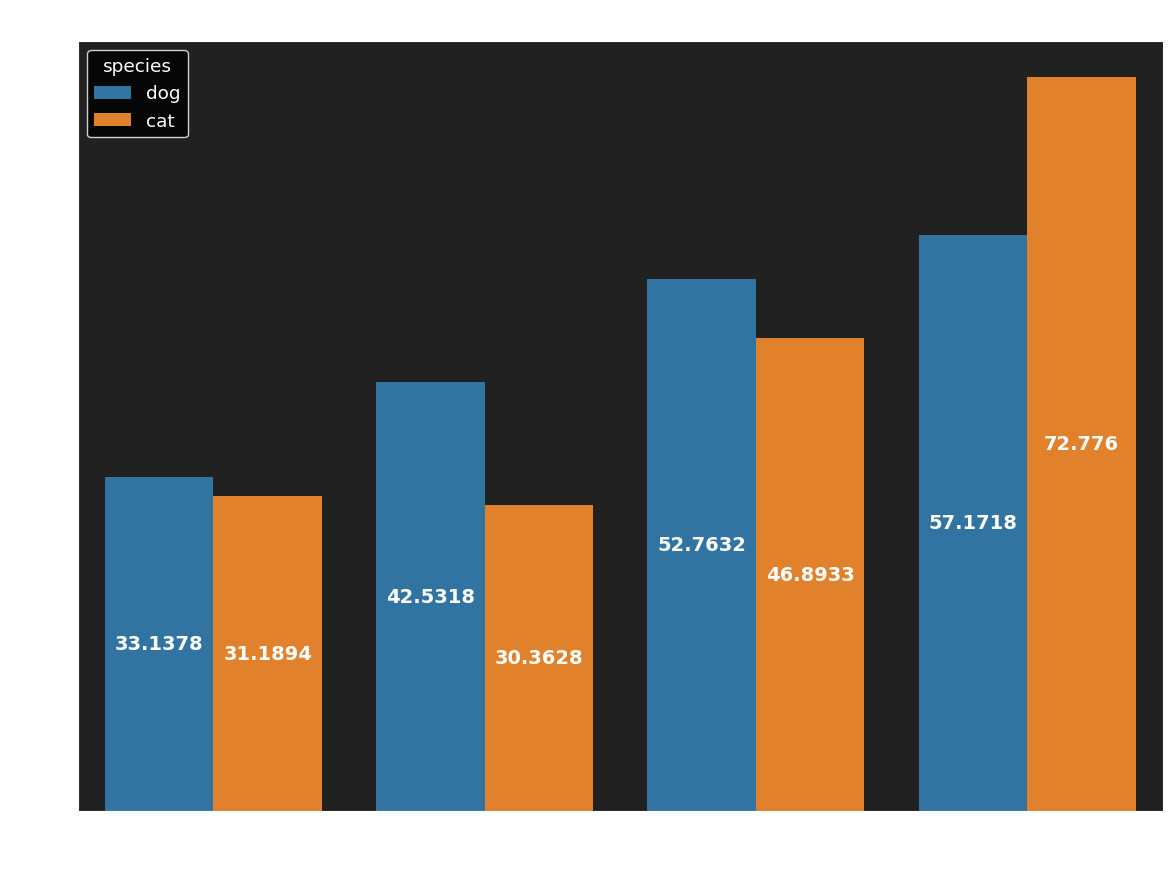

In [26]:
plt.style.use('assets/dark.mplstyle')

plt.figure(figsize=(14, 10))
splot = sns.barplot(x='size', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel("Size", size=18, color='white')
plt.ylabel("time in days", size=18, color='white')
plt.yticks(size=16, color='white')
plt.xticks(size=16, color='white')
plt.title("Average adoption times by size", size=22, color='white')
plt.bar_label(splot.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(splot.containers[1], label_type='center', size=14, color='white', weight='bold')

plt.setp([splot.spines.values(), splot.get_xticklines(), splot.get_yticklines()], color='white')
    
splot.set_facecolor(color='#212121')
plt.savefig('assets/avg_time_by_size_dark.png', bbox_inches="tight")
plt.show()

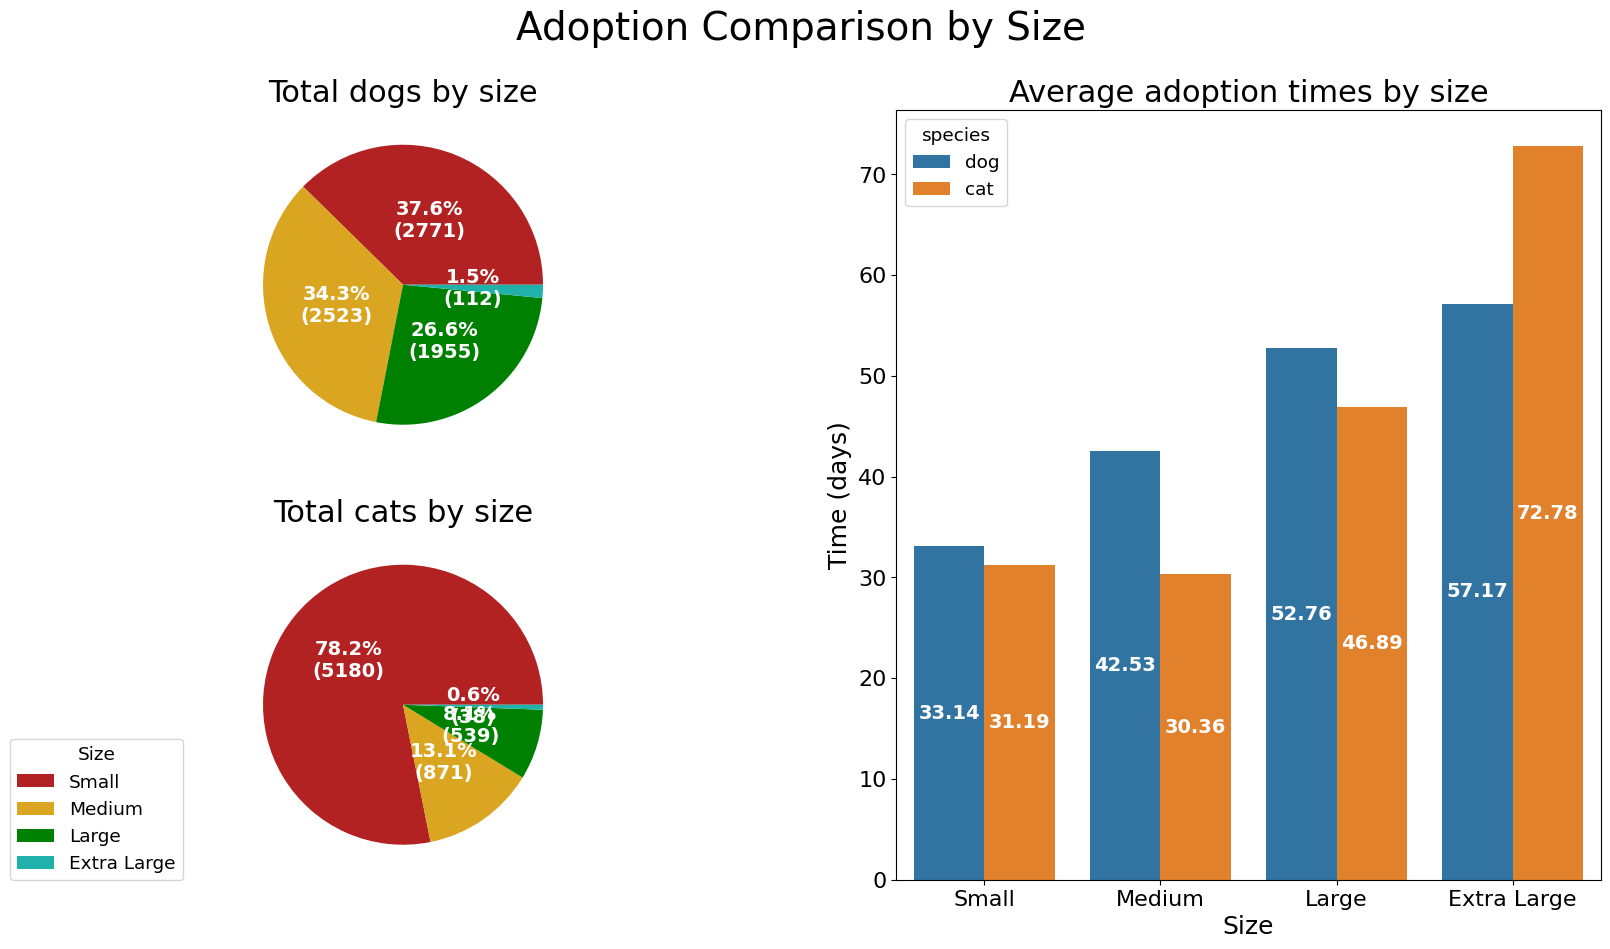

In [266]:
import matplotlib.gridspec as gridspec
plt.style.use('default')
plt.style.use('assets/light.mplstyle')

df_size_totals_dog = pd.DataFrame(dogs['size'].value_counts()).reset_index().rename({'index':'size', 'size':'count'}, axis=1)
df_size_totals_cat = pd.DataFrame(cats['size'].value_counts()).reset_index().rename({'index':'size', 'size':'count'}, axis=1)

# create objects
fig = plt.figure(figsize=(20,10))
gridspan = fig.add_gridspec(2, 2)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, -1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# # pie chart on top left for dog totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']
patches1, labels1, autotext1 = ax1.pie(df_size_totals_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_size_totals_dog['count']), pctdistance=0.5)


plt.setp(autotext1, size=14, weight="bold", color="w")

ax1.set_title("Total dogs by size")
fig.legend(df['size'].unique(), title="Size", bbox_to_anchor=(.1, .1), loc='lower left')


# # pie chart on top left for cat totals
patches2, labels2, autotext2 = ax2.pie(df_size_totals_cat['count'], autopct=lambda pct: func(pct, df_size_totals_cat['count']), pctdistance=0.5, colors=colors)


ax2.set_title("Total cats by size")
plt.setp(autotext2, size=14, weight="bold", color="w")


# # bar chart on the right for adoption time comparison
# plt.subplot(1,2,2)

ax3 = sns.barplot(x='size', y='duration_as_adoptable', data=df, hue='species', ci=None)
plt.xlabel("Size")
plt.ylabel("Time (days)")
plt.title("Average adoption times by size")
ax3.bar_label(ax3.containers[0], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')
ax3.bar_label(ax3.containers[1], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Comparison by Size', size=28)

plt.savefig('assets/total_avg_size.png', bbox_inches="tight")
plt.show()

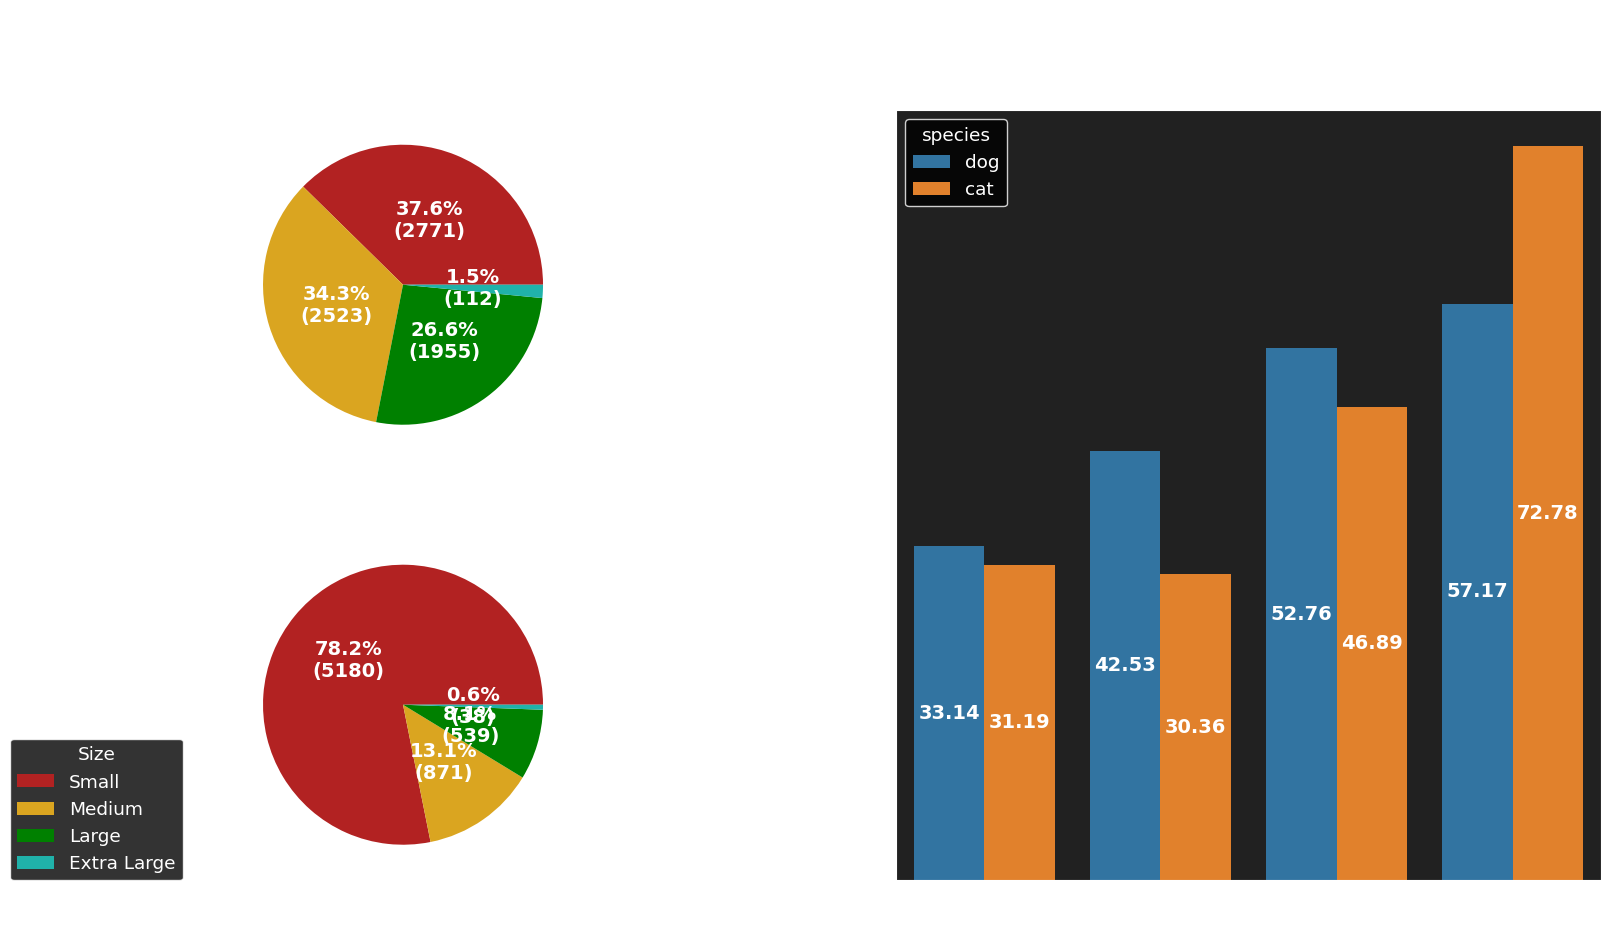

In [267]:

plt.style.use('assets/dark.mplstyle')

df_size_totals_dog = pd.DataFrame(dogs['size'].value_counts()).reset_index().rename({'index':'size', 'size':'count'}, axis=1)
df_size_totals_cat = pd.DataFrame(cats['size'].value_counts()).reset_index().rename({'index':'size', 'size':'count'}, axis=1)

# create objects
fig = plt.figure(figsize=(20,10))
gridspan = fig.add_gridspec(2, 2)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, -1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# # pie chart on top left for dog totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']
patches1, labels1, autotext1 = ax1.pie(df_size_totals_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_size_totals_dog['count']), pctdistance=0.5)


plt.setp(autotext1, size=14, weight="bold", color="w")

ax1.set_title("Total dogs by size")
fig.legend(df['size'].unique(), title="Size", bbox_to_anchor=(.1, .1), loc='lower left')


# # pie chart on top left for cat totals
patches2, labels2, autotext2 = ax2.pie(df_size_totals_cat['count'], autopct=lambda pct: func(pct, df_size_totals_cat['count']), pctdistance=0.5, colors=colors)


ax2.set_title("Total cats by size")
plt.setp(autotext2, size=14, weight="bold", color="w")


# # bar chart on the right for adoption time comparison
# plt.subplot(1,2,2)

ax3 = sns.barplot(x='size', y='duration_as_adoptable', data=df, hue='species', ci=None)
plt.xlabel("Size")
plt.ylabel("Time (days)")
plt.title("Average adoption times by size")
ax3.bar_label(ax3.containers[0], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')
ax3.bar_label(ax3.containers[1], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Comparison by Size', size=28)

plt.savefig('assets/total_avg_size_dark.png', bbox_inches="tight")
plt.show()

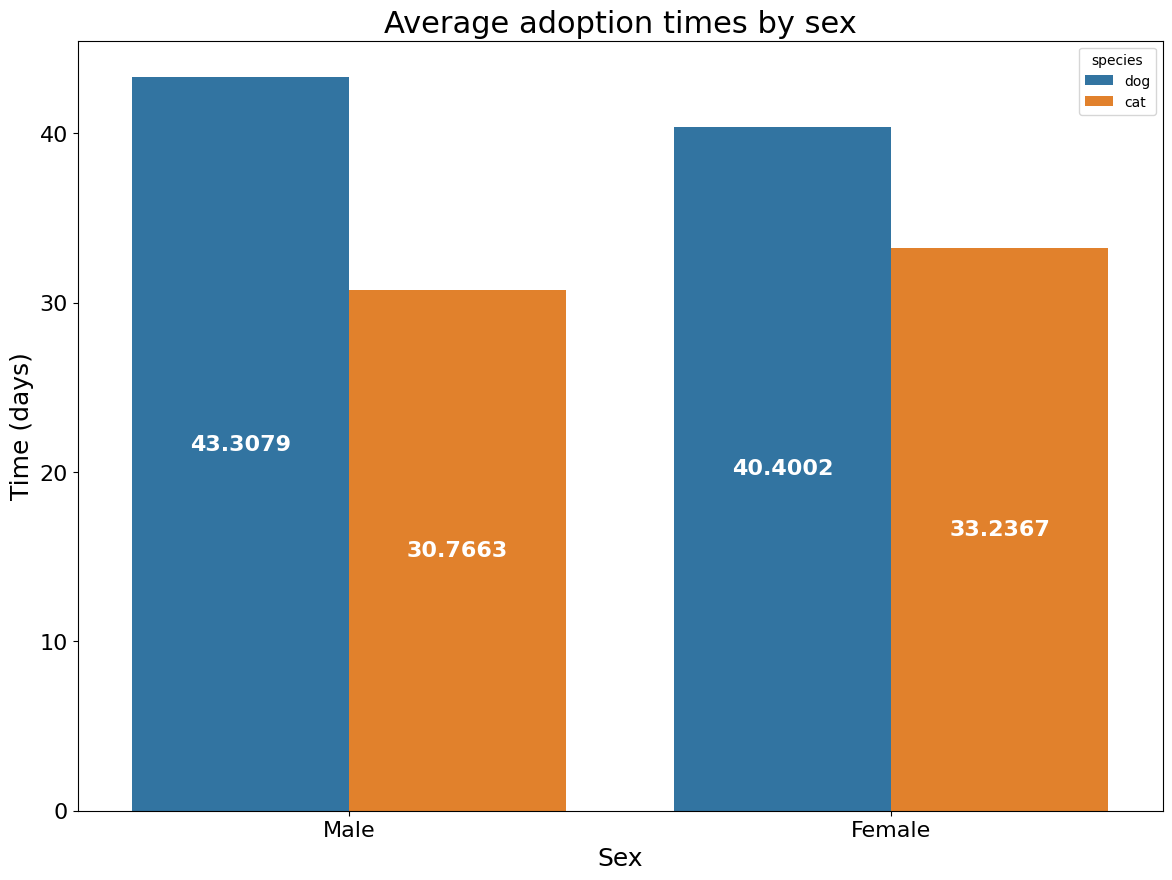

In [27]:
plt.style.use('default')

plt.figure(figsize=(14, 10))
splot = sns.barplot(x='gender', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel("Sex", size=18)
plt.ylabel("Time (days)", size=18)
plt.yticks(size=16)
plt.xticks(size=16)
plt.title("Average adoption times by sex", size=22)
plt.bar_label(splot.containers[0], label_type='center', size=16, color='white', weight='bold')
plt.bar_label(splot.containers[1], label_type='center', size=16, color='white', weight='bold')

plt.savefig('assets/avg_time_by_sex.png', bbox_inches="tight")
plt.show()

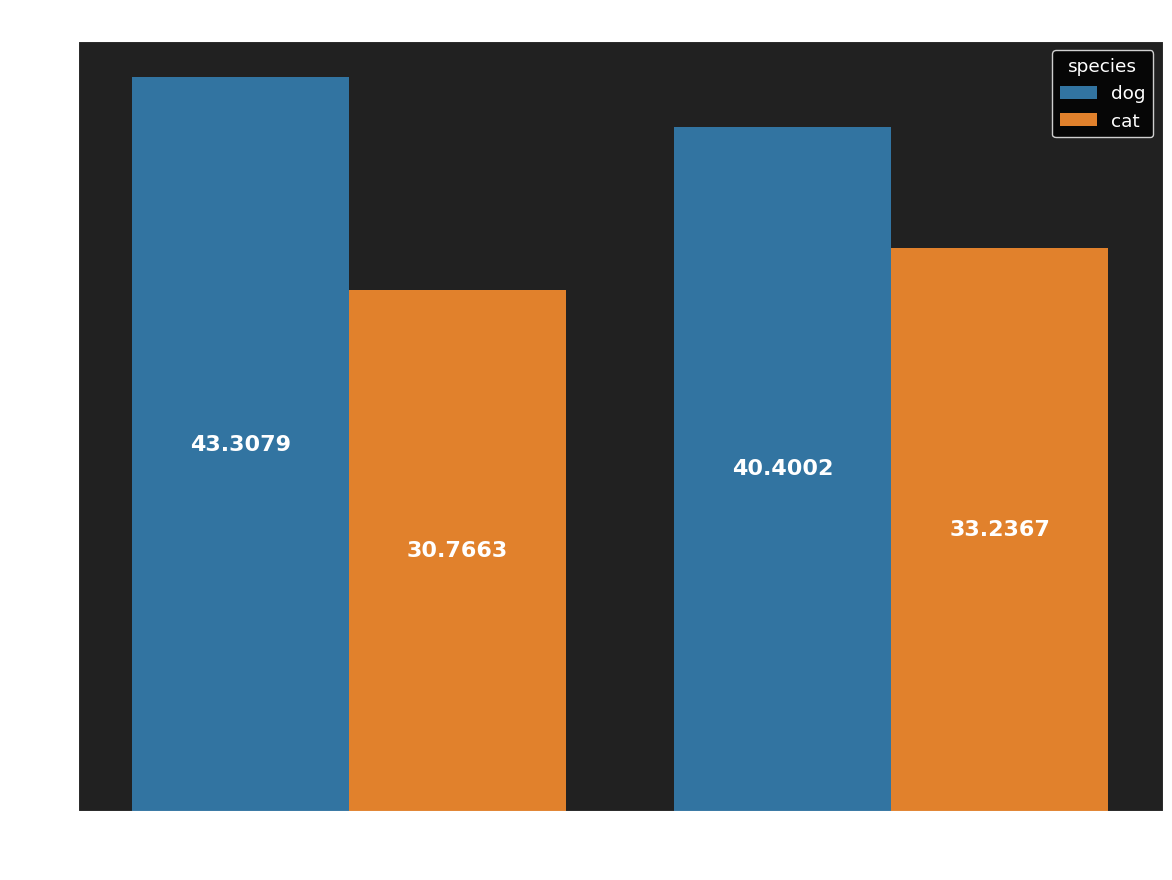

In [28]:
plt.style.use('assets/dark.mplstyle')

plt.figure(figsize=(14, 10))
splot = sns.barplot(x='gender', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel("Sex", size=18, color='white')
plt.ylabel("Time (days)", size=18, color='white')
plt.yticks(size=16, color='white')
plt.xticks(size=16, color='white')
plt.title("Average adoption times by sex", size=22, color='white')
plt.bar_label(splot.containers[0], label_type='center', size=16, color='white', weight='bold')
plt.bar_label(splot.containers[1], label_type='center', size=16, color='white', weight='bold')

plt.setp([splot.spines.values(), splot.get_xticklines(), splot.get_yticklines()], color='white')
    
splot.set_facecolor(color='#212121')
plt.savefig('assets/avg_time_by_sex_dark.png', bbox_inches="tight")
plt.show()

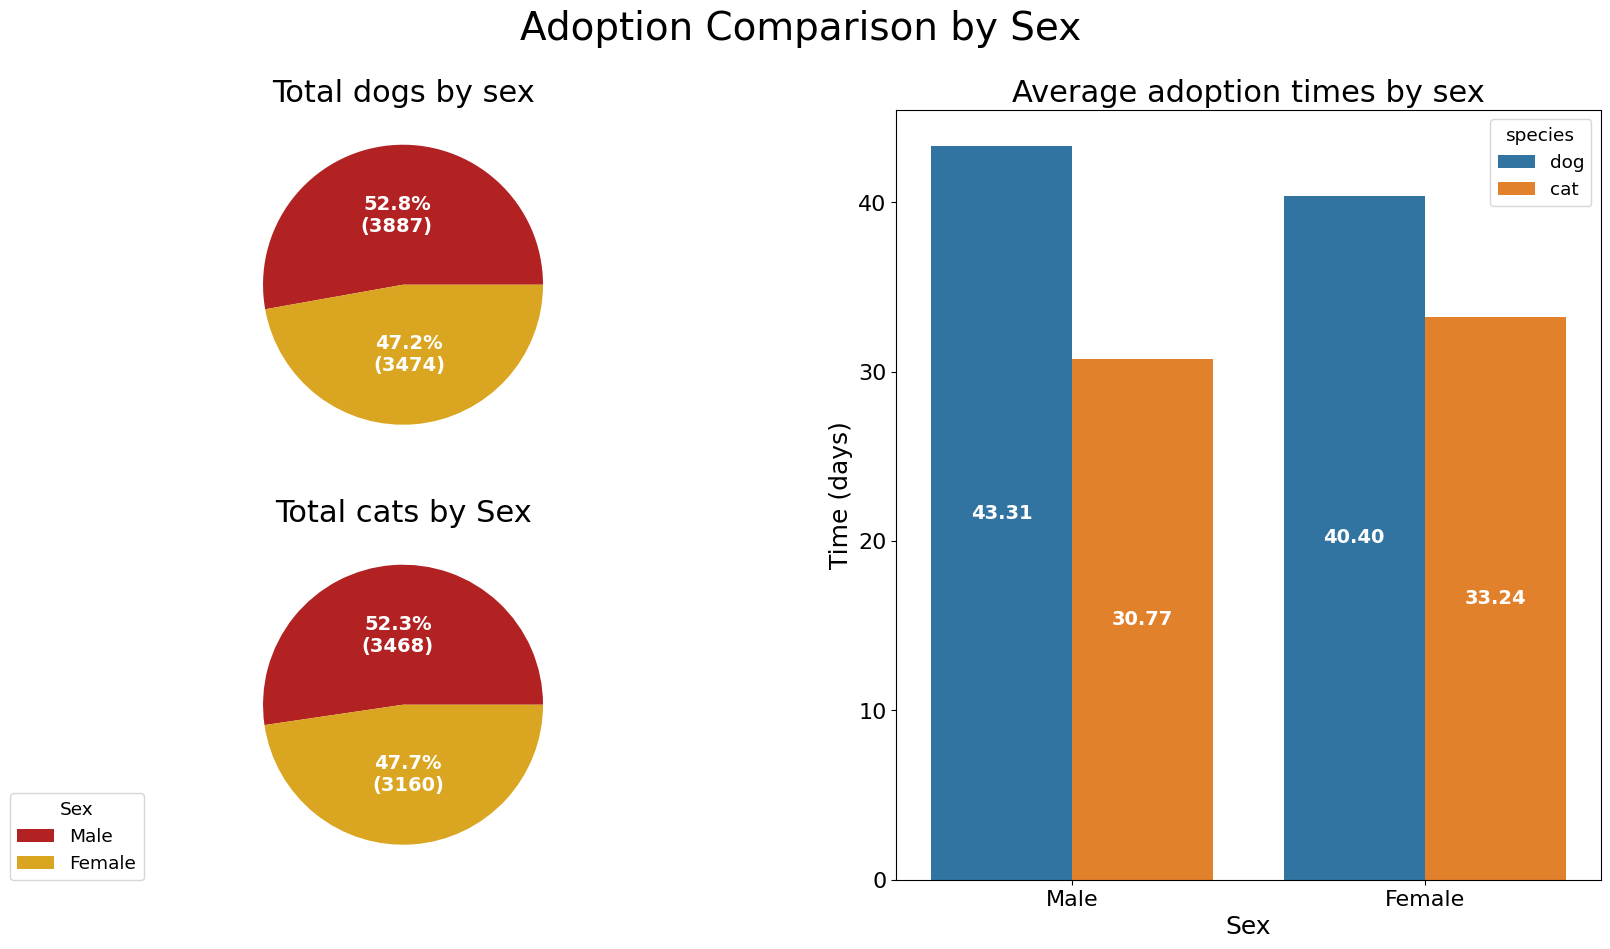

In [272]:
plt.style.use('default')
plt.style.use('assets/light.mplstyle')

df_sex_totals_dog = pd.DataFrame(dogs['gender'].value_counts()).reset_index().rename({'index':'sex', 'gender':'count'}, axis=1)
df_sex_totals_cat = pd.DataFrame(cats['gender'].value_counts()).reset_index().rename({'index':'sex', 'gender':'count'}, axis=1)

# create objects
fig = plt.figure(figsize=(20,10))
gridspan = fig.add_gridspec(2, 2)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, -1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# # pie chart on top left for dog totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']
patches1, labels1, autotext1 = ax1.pie(df_sex_totals_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_sex_totals_dog['count']), pctdistance=0.5)


plt.setp(autotext1, size=14, weight="bold", color="w")

ax1.set_title("Total dogs by sex")
fig.legend(df['gender'].unique(), title="Sex", bbox_to_anchor=(.1, .1), loc='lower left')


# # pie chart on top left for cat totals
patches2, labels2, autotext2 = ax2.pie(df_sex_totals_cat['count'], autopct=lambda pct: func(pct, df_sex_totals_cat['count']), pctdistance=0.5, colors=colors)


ax2.set_title("Total cats by Sex")
plt.setp(autotext2, size=14, weight="bold", color="w")


# # bar chart on the right for adoption time comparison
# plt.subplot(1,2,2)

ax3 = sns.barplot(x='gender', y='duration_as_adoptable', data=df, hue='species', ci=None)
plt.xlabel("Sex")
plt.ylabel("Time (days)")
plt.title("Average adoption times by sex")
ax3.bar_label(ax3.containers[0], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')
ax3.bar_label(ax3.containers[1], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Comparison by Sex', size=28)

plt.savefig('assets/total_avg_sex.png', bbox_inches="tight")
plt.show()

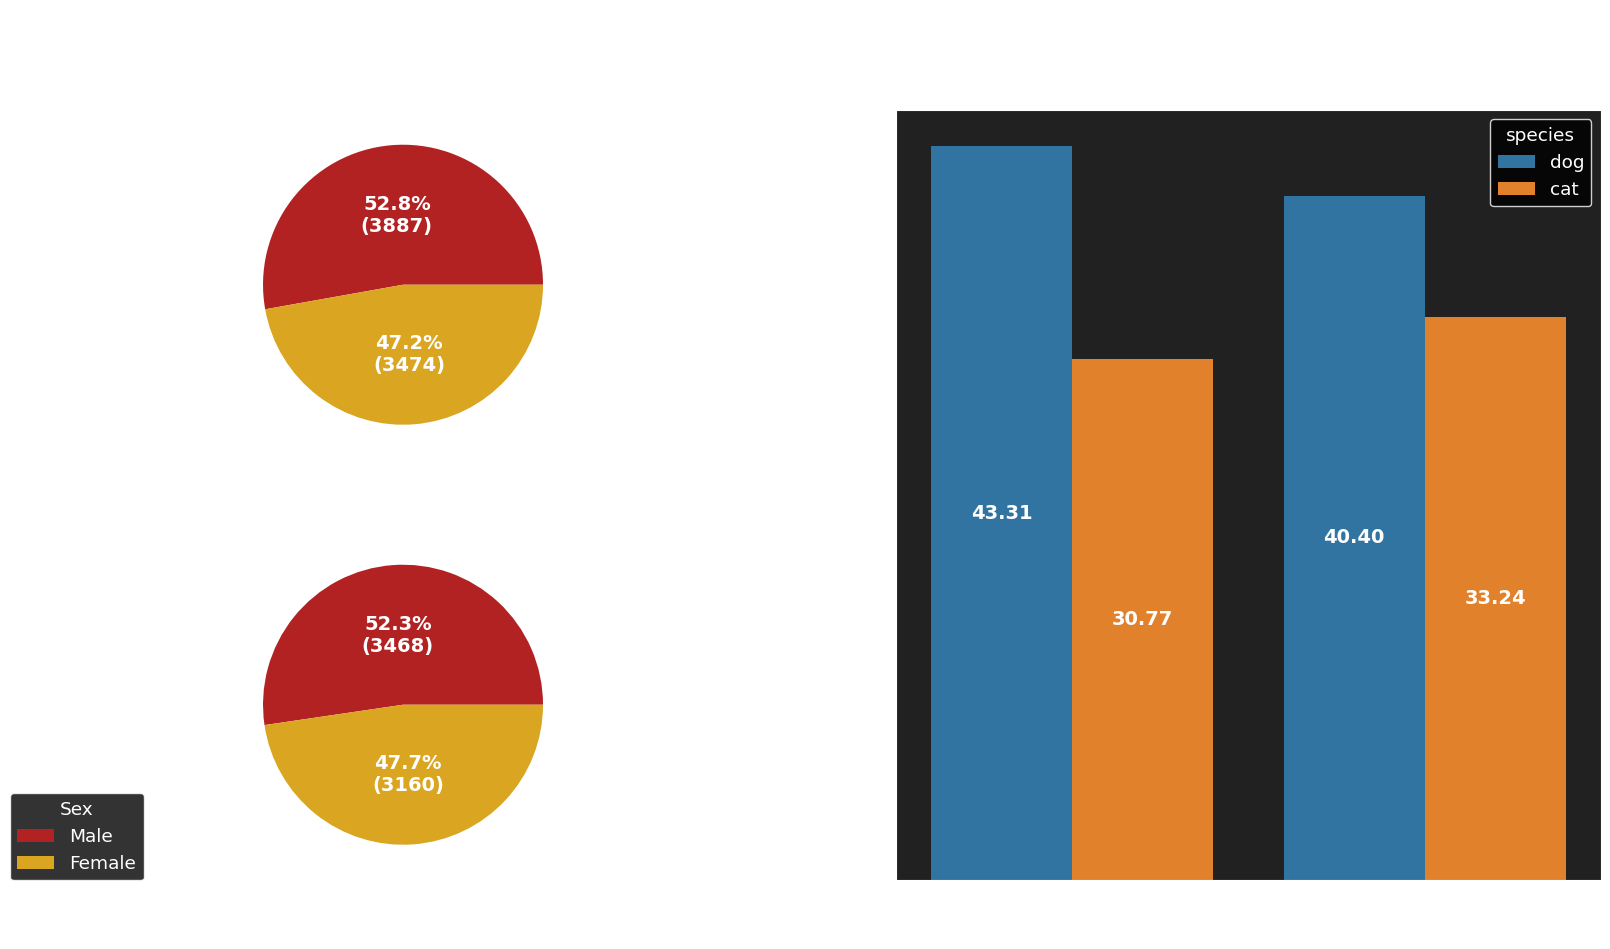

In [273]:

plt.style.use('assets/dark.mplstyle')

df_sex_totals_dog = pd.DataFrame(dogs['gender'].value_counts()).reset_index().rename({'index':'sex', 'gender':'count'}, axis=1)
df_sex_totals_cat = pd.DataFrame(cats['gender'].value_counts()).reset_index().rename({'index':'sex', 'gender':'count'}, axis=1)

# create objects
fig = plt.figure(figsize=(20,10))
gridspan = fig.add_gridspec(2, 2)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, -1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,2, figsize=(20,10), gridspec_kw={'width_ratios': [1, 2]})

# # pie chart on top left for dog totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']
patches1, labels1, autotext1 = ax1.pie(df_sex_totals_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_sex_totals_dog['count']), pctdistance=0.5)


plt.setp(autotext1, size=14, weight="bold", color="w")

ax1.set_title("Total dogs by sex")
fig.legend(df['gender'].unique(), title="Sex", bbox_to_anchor=(.1, .1), loc='lower left')


# # pie chart on top left for cat totals
patches2, labels2, autotext2 = ax2.pie(df_sex_totals_cat['count'], autopct=lambda pct: func(pct, df_sex_totals_cat['count']), pctdistance=0.5, colors=colors)


ax2.set_title("Total cats by Sex")
plt.setp(autotext2, size=14, weight="bold", color="w")


# # bar chart on the right for adoption time comparison
# plt.subplot(1,2,2)

ax3 = sns.barplot(x='gender', y='duration_as_adoptable', data=df, hue='species', ci=None)
plt.xlabel("Sex")
plt.ylabel("Time (days)")
plt.title("Average adoption times by sex")
ax3.bar_label(ax3.containers[0], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')
ax3.bar_label(ax3.containers[1], label_type='center', size=14, weight='bold', color='w', fmt='%.2f')

plt.suptitle('Adoption Comparison by Sex', size=28)

plt.savefig('assets/total_avg_sex_dark.png', bbox_inches="tight")
plt.show()

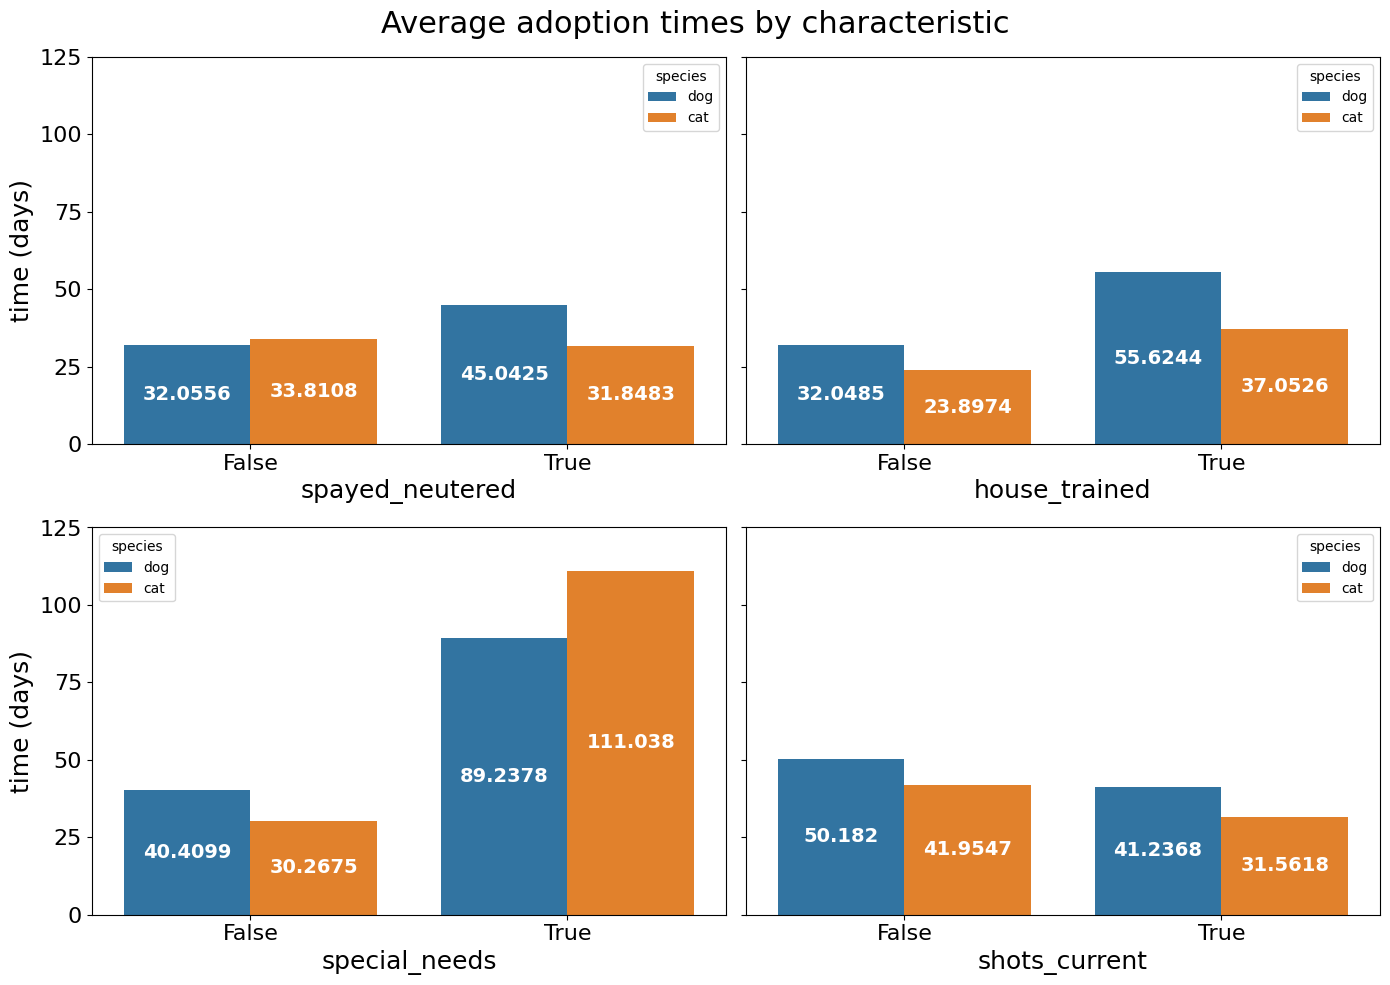

In [29]:
plt.style.use('default')

plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
#This will create the bar graph for spayed_neutered
altered = sns.barplot(x='spayed_neutered', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('spayed_neutered', size=18)
plt.ylabel('time (days)', size=18)
plt.yticks([0,25,50,75,100,125], size=16)
plt.xticks(size=16)
plt.bar_label(altered.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(altered.containers[1], label_type='center', size=14, color='white', weight='bold')

#This will create the bar graph for house_trained
plt.subplot(2,2,2)
trained = sns.barplot(x='house_trained', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('house_trained', size=18)
plt.ylabel('', size=18)
plt.yticks([0,25,50,75,100,125], [], size=16)
plt.xticks(size=16)
plt.bar_label(trained.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(trained.containers[1], label_type='center', size=14, color='white', weight='bold')

#This will create the bar graph for special_needs
plt.subplot(2,2,3)
needs = sns.barplot(x='special_needs', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('special_needs', size=18)
plt.ylabel('time (days)', size=18)
plt.yticks([0,25,50,75,100,125], size=16)
plt.xticks(size=16)
plt.bar_label(needs.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(needs.containers[1], label_type='center', size=14, color='white', weight='bold')

#This will create the bar graph for shots_current
plt.subplot(2,2,4)
shots = sns.barplot(x='shots_current', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('shots_current', size=18)
plt.ylabel('', size=18)
plt.yticks([0,25,50,75,100,125], [], size=16)
plt.xticks(size=16)
plt.bar_label(shots.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(shots.containers[1], label_type='center', size=14, color='white', weight='bold')

plt.suptitle("Average adoption times by characteristic", size=22)
plt.tight_layout()

plt.savefig('assets/avg_time_by_characteristic.png', bbox_inches="tight")
plt.show()

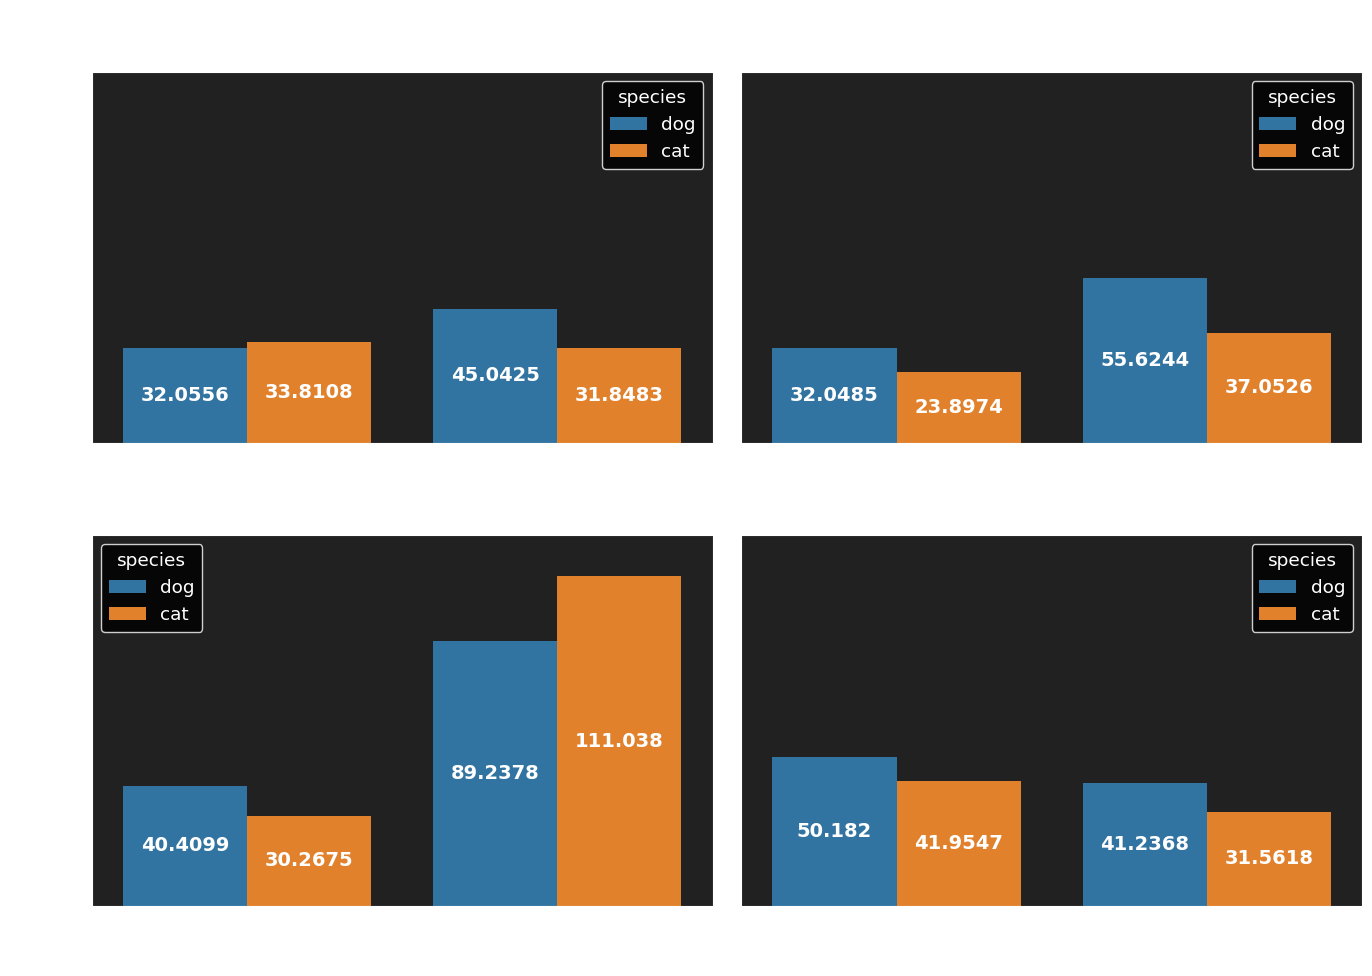

In [30]:
plt.style.use('assets/dark.mplstyle')

plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
#This will create the bar graph for spayed_neutered
altered = sns.barplot(x='spayed_neutered', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('spayed_neutered')
plt.ylabel('time (days)')
plt.yticks([0,25,50,75,100,125])
plt.bar_label(altered.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(altered.containers[1], label_type='center', size=14, color='white', weight='bold')

#This will create the bar graph for house_trained
plt.subplot(2,2,2)
trained = sns.barplot(x='house_trained', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('house_trained')
plt.ylabel('')
plt.yticks([0,25,50,75,100,125], [])
plt.bar_label(trained.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(trained.containers[1], label_type='center', size=14, color='white', weight='bold')

#This will create the bar graph for special_needs
plt.subplot(2,2,3)
needs = sns.barplot(x='special_needs', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('special_needs')
plt.ylabel('time (days)')
plt.yticks([0,25,50,75,100,125])
plt.bar_label(needs.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(needs.containers[1], label_type='center', size=14, color='white', weight='bold')

#This will create the bar graph for shots_current
plt.subplot(2,2,4)
shots = sns.barplot(x='shots_current', y='duration_as_adoptable', data=df, ci=None, hue='species')
plt.xlabel('shots_current')
plt.ylabel('')
plt.yticks([0,25,50,75,100,125], [])
plt.bar_label(shots.containers[0], label_type='center', size=14, color='white', weight='bold')
plt.bar_label(shots.containers[1], label_type='center', size=14, color='white', weight='bold')

plt.suptitle("Average adoption times by characteristic")
plt.tight_layout()

plt.savefig('assets/avg_time_by_characteristic_dark.png', bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='goodwith_dogs', ylabel='duration_as_adoptable'>

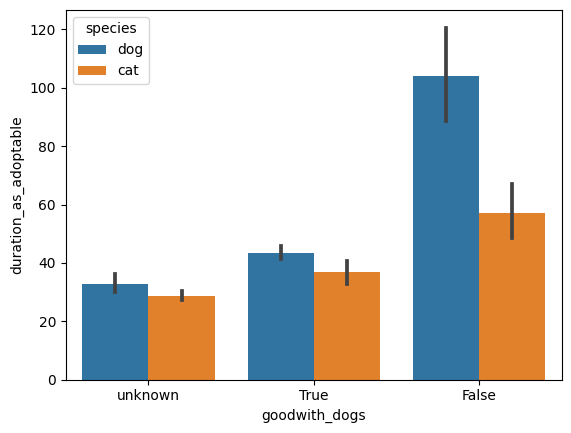

In [46]:
plt.style.use('default')
sns.barplot(x='goodwith_dogs', y='duration_as_adoptable', data=df, hue='species')

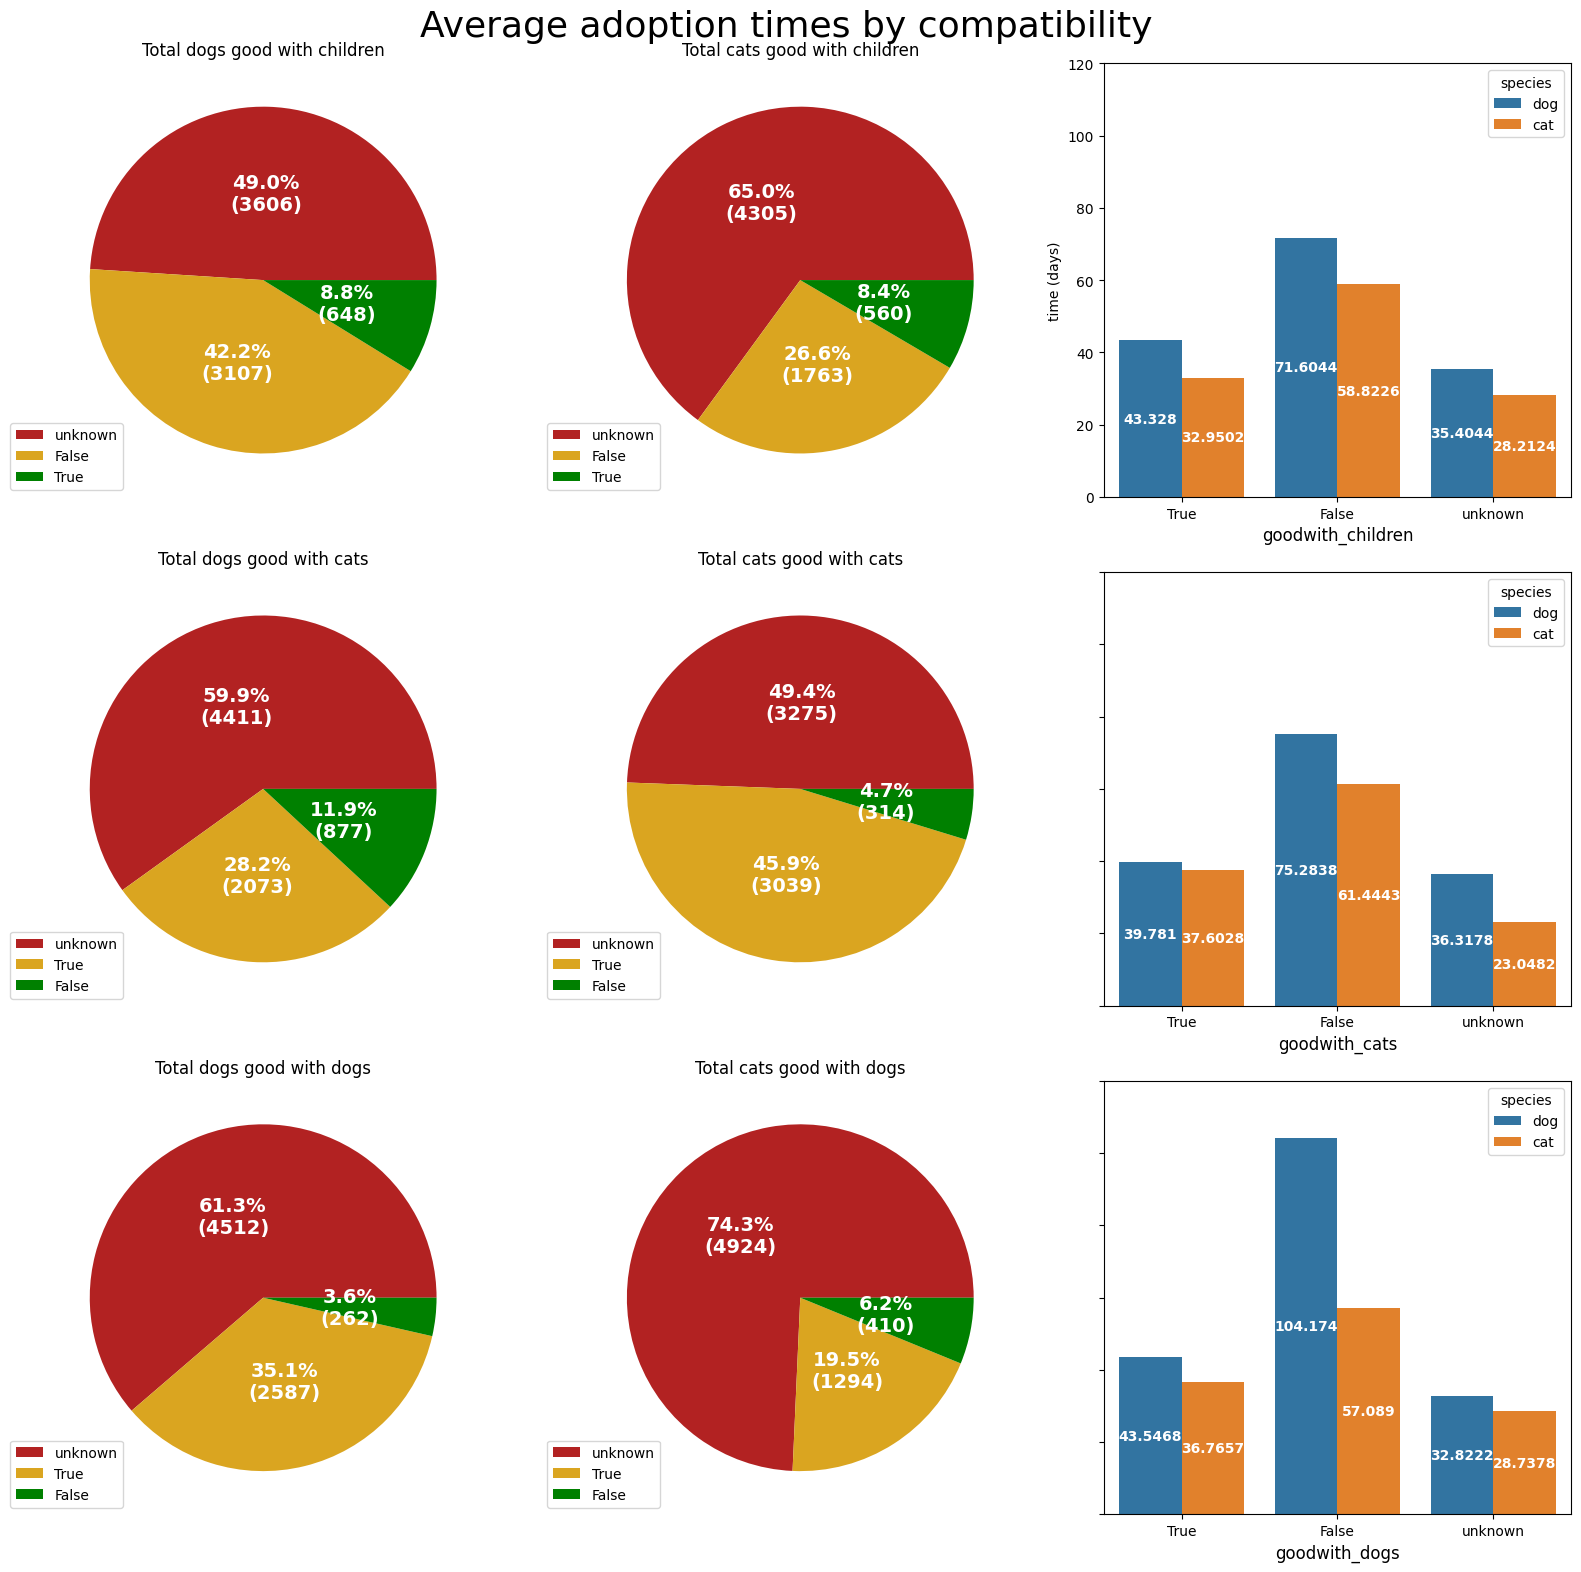

In [339]:
plt.style.use('default')

plt.figure(figsize=(16, 16))
plt.subplot(3,3,3)
#This will create the bar graph for children
child = sns.barplot(x='goodwith_children', y='duration_as_adoptable', data=df, ci=None, hue='species', order=['True', 'False', 'unknown'])
plt.xlabel('goodwith_children', size=12)
plt.yticks([0,20,40,60,80,100,120])
plt.ylabel('time (days)')
plt.bar_label(child.containers[0], label_type='center', size=10, color='white', weight='bold')
plt.bar_label(child.containers[1], label_type='center', size=10, color='white', weight='bold')

#This will create the bar graph for cats
plt.subplot(3,3,6)
cat = sns.barplot(x='goodwith_cats', y='duration_as_adoptable', data=df, ci=None, hue='species', order=['True', 'False', 'unknown'])
plt.xlabel('goodwith_cats', size=12)
plt.yticks([0,20,40,60,80,100,120],[])
plt.ylabel('')
plt.bar_label(cat.containers[0], label_type='center', size=10, color='white', weight='bold')
plt.bar_label(cat.containers[1], label_type='center', size=10, color='white', weight='bold')

#This will create the bar graph for dogs
plt.subplot(3,3,9)
dog = sns.barplot(x='goodwith_dogs', y='duration_as_adoptable', data=df, ci=None, hue='species', order=['True', 'False', 'unknown'])
plt.xlabel('goodwith_dogs', size=12)
plt.yticks([0,20,40,60,80,100,120],[])
plt.ylabel('')
plt.bar_label(dog.containers[0], label_type='center', size=10, color='white', weight='bold')
plt.bar_label(dog.containers[1], label_type='center', size=10, color='white', weight='bold')

########## Pie charts for totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']

# dogs good with children
dogs_children = plt.subplot(3,3,1)

df_children_dog = pd.DataFrame(dogs['goodwith_children'].value_counts()).reset_index().rename({'index':'goodwith_children', 'goodwith_children':'count'}, axis=1)

patches_children, labels_children, autotext_children = dogs_children.pie(df_children_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_children_dog['count']), pctdistance=0.5)

plt.setp(autotext_children, size=14, weight="bold", color="w")

dogs_children.set_title("Total dogs good with children")
dogs_children.legend(df['goodwith_children'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# dogs good with cats
dogs_cats = plt.subplot(3,3,4)

df_cats_dog = pd.DataFrame(dogs['goodwith_cats'].value_counts()).reset_index().rename({'index':'goodwith_cats', 'goodwith_cats':'count'}, axis=1)

patches_cats, labels_cats, autotext_cats = dogs_cats.pie(df_cats_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_cats_dog['count']), pctdistance=0.5)

plt.setp(autotext_cats, size=14, weight="bold", color="w")

dogs_cats.set_title("Total dogs good with cats")
dogs_cats.legend(df['goodwith_cats'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# dogs good with dogs
dogs_dogs = plt.subplot(3,3,7)

df_dogs_dog = pd.DataFrame(dogs['goodwith_dogs'].value_counts()).reset_index().rename({'index':'goodwith_dogs', 'goodwith_dogs':'count'}, axis=1)

patches_dogs, labels_dogs, autotext_dogs = dogs_dogs.pie(df_dogs_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_dogs_dog['count']), pctdistance=0.5)

plt.setp(autotext_dogs, size=14, weight="bold", color="w")

dogs_dogs.set_title("Total dogs good with dogs")
dogs_dogs.legend(df['goodwith_dogs'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

########

# cats good with children
cats_children = plt.subplot(3,3,2)

df_children_cat = pd.DataFrame(cats['goodwith_children'].value_counts()).reset_index().rename({'index':'goodwith_children', 'goodwith_children':'count'}, axis=1)

patches_c_children, labels_c_children, autotext_c_children = cats_children.pie(df_children_cat['count'], colors=colors, autopct=lambda pct: func(pct, df_children_cat['count']), pctdistance=0.5)

plt.setp(autotext_c_children, size=14, weight="bold", color="w")

cats_children.set_title("Total cats good with children")
cats_children.legend(df['goodwith_children'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# cats good with cats
cats_cats = plt.subplot(3,3,5)

df_cats_cat = pd.DataFrame(cats['goodwith_cats'].value_counts()).reset_index().rename({'index':'goodwith_cats', 'goodwith_cats':'count'}, axis=1)

patches_c_cats, labels_c_cats, autotext_c_cats = cats_cats.pie(df_cats_cat['count'], colors=colors, autopct=lambda pct: func(pct, df_cats_cat['count']), pctdistance=0.5)

plt.setp(autotext_c_cats, size=14, weight="bold", color="w")

cats_cats.set_title("Total cats good with cats")
cats_cats.legend(df['goodwith_cats'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# cats good with dogs
cats_dogs = plt.subplot(3,3,8)

df_dogs_cat = pd.DataFrame(cats['goodwith_dogs'].value_counts()).reset_index().rename({'index':'goodwith_dogs', 'goodwith_dogs':'count'}, axis=1)

patches_c_dogs, labels_c_dogs, autotext_c_dogs = cats_dogs.pie(df_dogs_cat['count'], colors=colors, autopct=lambda pct: func(pct, df_dogs_cat['count']), pctdistance=0.5)

plt.setp(autotext_c_dogs, size=14, weight="bold", color="w")

cats_dogs.set_title("Total cats good with dogs")
cats_dogs.legend(df['goodwith_dogs'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')
########

plt.suptitle("Average adoption times by compatibility", size=26)
plt.tight_layout(h_pad=2)

plt.savefig('assets/total_by_goodwith.png', bbox_inches="tight")
plt.show()


Bad key axes.suptitlesize in file assets/dark.mplstyle, line 5 ('axes.suptitlesize : 22')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution


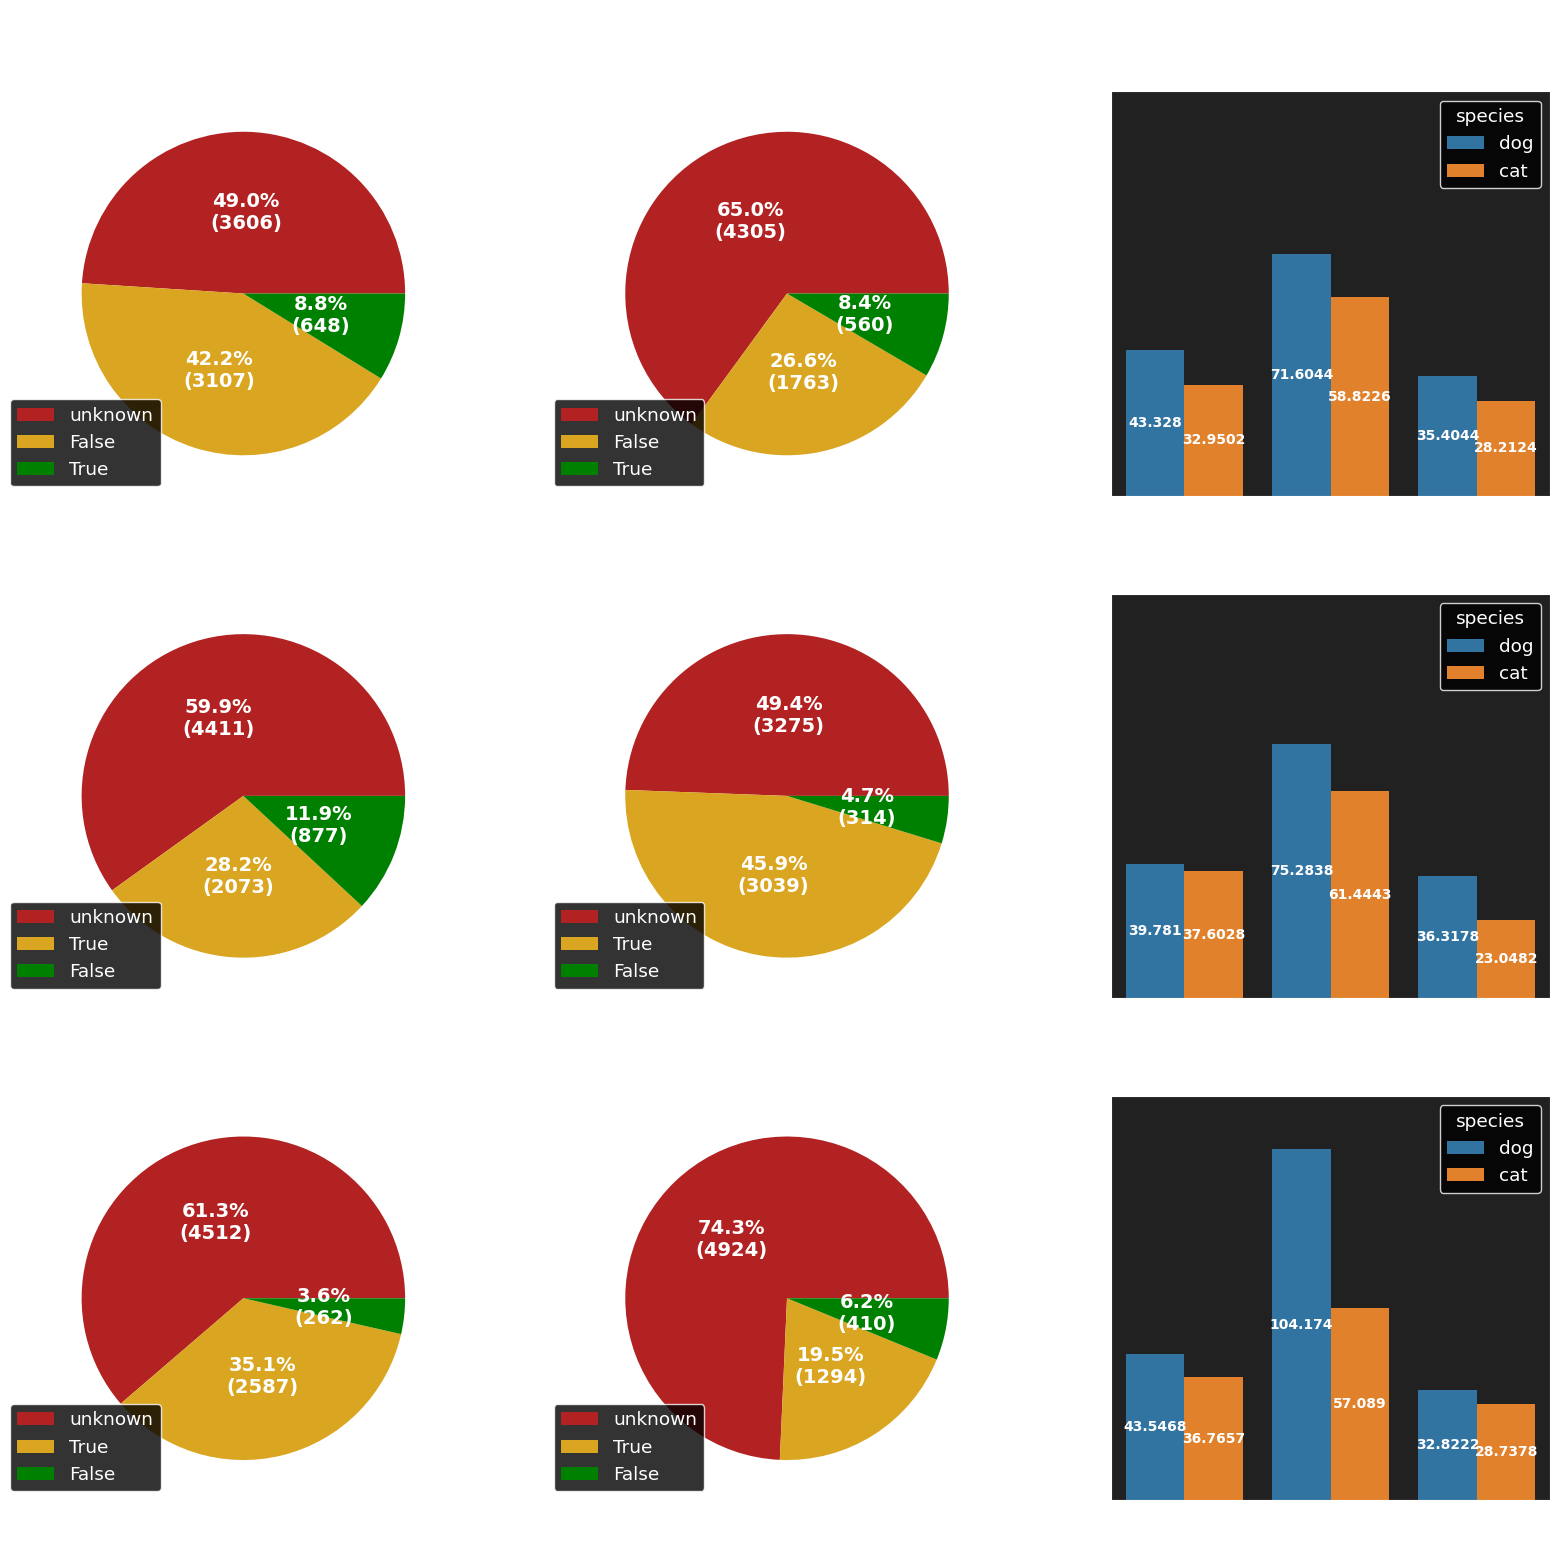

In [338]:
plt.style.use('assets/dark.mplstyle')

plt.figure(figsize=(16, 16))
plt.subplot(3,3,3)
#This will create the bar graph for children
child = sns.barplot(x='goodwith_children', y='duration_as_adoptable', data=df, ci=None, hue='species', order=['True', 'False', 'unknown'])
plt.xlabel('goodwith_children', size=12)
plt.yticks([0,20,40,60,80,100,120])
plt.ylabel('time (days)')
plt.bar_label(child.containers[0], label_type='center', size=10, color='white', weight='bold')
plt.bar_label(child.containers[1], label_type='center', size=10, color='white', weight='bold')

#This will create the bar graph for cats
plt.subplot(3,3,6)
cat = sns.barplot(x='goodwith_cats', y='duration_as_adoptable', data=df, ci=None, hue='species', order=['True', 'False', 'unknown'])
plt.xlabel('goodwith_cats', size=12)
plt.yticks([0,20,40,60,80,100,120],[])
plt.ylabel('')
plt.bar_label(cat.containers[0], label_type='center', size=10, color='white', weight='bold')
plt.bar_label(cat.containers[1], label_type='center', size=10, color='white', weight='bold')

#This will create the bar graph for dogs
plt.subplot(3,3,9)
dog = sns.barplot(x='goodwith_dogs', y='duration_as_adoptable', data=df, ci=None, hue='species', order=['True', 'False', 'unknown'])
plt.xlabel('goodwith_dogs', size=12)
plt.yticks([0,20,40,60,80,100,120],[])
plt.ylabel('')
plt.bar_label(dog.containers[0], label_type='center', size=10, color='white', weight='bold')
plt.bar_label(dog.containers[1], label_type='center', size=10, color='white', weight='bold')

########## Pie charts for totals
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['firebrick', 'goldenrod', 'green', 'lightseagreen']

# dogs good with children
dogs_children = plt.subplot(3,3,1)

df_children_dog = pd.DataFrame(dogs['goodwith_children'].value_counts()).reset_index().rename({'index':'goodwith_children', 'goodwith_children':'count'}, axis=1)

patches_children, labels_children, autotext_children = dogs_children.pie(df_children_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_children_dog['count']), pctdistance=0.5)

plt.setp(autotext_children, size=14, weight="bold", color="w")

dogs_children.set_title("Total dogs good with children")
dogs_children.legend(df['goodwith_children'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# dogs good with cats
dogs_cats = plt.subplot(3,3,4)

df_cats_dog = pd.DataFrame(dogs['goodwith_cats'].value_counts()).reset_index().rename({'index':'goodwith_cats', 'goodwith_cats':'count'}, axis=1)

patches_cats, labels_cats, autotext_cats = dogs_cats.pie(df_cats_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_cats_dog['count']), pctdistance=0.5)

plt.setp(autotext_cats, size=14, weight="bold", color="w")

dogs_cats.set_title("Total dogs good with cats")
dogs_cats.legend(df['goodwith_cats'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# dogs good with dogs
dogs_dogs = plt.subplot(3,3,7)

df_dogs_dog = pd.DataFrame(dogs['goodwith_dogs'].value_counts()).reset_index().rename({'index':'goodwith_dogs', 'goodwith_dogs':'count'}, axis=1)

patches_dogs, labels_dogs, autotext_dogs = dogs_dogs.pie(df_dogs_dog['count'], colors=colors, autopct=lambda pct: func(pct, df_dogs_dog['count']), pctdistance=0.5)

plt.setp(autotext_dogs, size=14, weight="bold", color="w")

dogs_dogs.set_title("Total dogs good with dogs")
dogs_dogs.legend(df['goodwith_dogs'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

########

# cats good with children
cats_children = plt.subplot(3,3,2)

df_children_cat = pd.DataFrame(cats['goodwith_children'].value_counts()).reset_index().rename({'index':'goodwith_children', 'goodwith_children':'count'}, axis=1)

patches_c_children, labels_c_children, autotext_c_children = cats_children.pie(df_children_cat['count'], colors=colors, autopct=lambda pct: func(pct, df_children_cat['count']), pctdistance=0.5)

plt.setp(autotext_c_children, size=14, weight="bold", color="w")

cats_children.set_title("Total cats good with children")
cats_children.legend(df['goodwith_children'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# cats good with cats
cats_cats = plt.subplot(3,3,5)

df_cats_cat = pd.DataFrame(cats['goodwith_cats'].value_counts()).reset_index().rename({'index':'goodwith_cats', 'goodwith_cats':'count'}, axis=1)

patches_c_cats, labels_c_cats, autotext_c_cats = cats_cats.pie(df_cats_cat['count'], colors=colors, autopct=lambda pct: func(pct, df_cats_cat['count']), pctdistance=0.5)

plt.setp(autotext_c_cats, size=14, weight="bold", color="w")

cats_cats.set_title("Total cats good with cats")
cats_cats.legend(df['goodwith_cats'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')

# cats good with dogs
cats_dogs = plt.subplot(3,3,8)

df_dogs_cat = pd.DataFrame(cats['goodwith_dogs'].value_counts()).reset_index().rename({'index':'goodwith_dogs', 'goodwith_dogs':'count'}, axis=1)

patches_c_dogs, labels_c_dogs, autotext_c_dogs = cats_dogs.pie(df_dogs_cat['count'], colors=colors, autopct=lambda pct: func(pct, df_dogs_cat['count']), pctdistance=0.5)

plt.setp(autotext_c_dogs, size=14, weight="bold", color="w")

cats_dogs.set_title("Total cats good with dogs")
cats_dogs.legend(df['goodwith_dogs'].unique(), bbox_to_anchor=(-.1, 0), loc='lower left')
########

plt.suptitle("Average adoption times by compatibility", size=26)
plt.tight_layout(h_pad=2)

plt.savefig('assets/total_by_goodwith_dark.png', bbox_inches="tight")
plt.show()

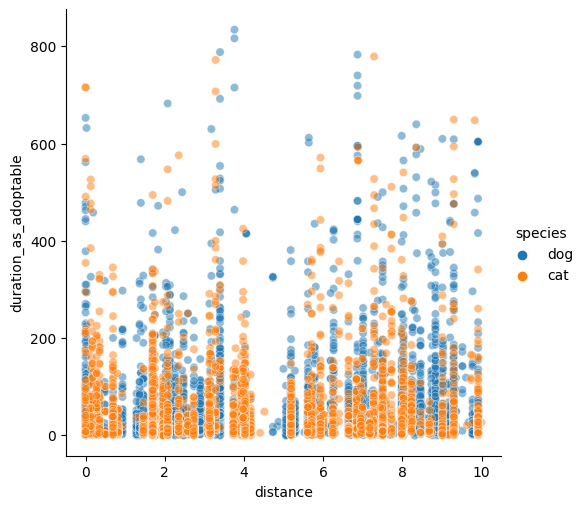

In [37]:
plt.style.use('default')

sns.relplot(x='distance', y='duration_as_adoptable', data=df, hue='species', kind='scatter', alpha=.5)

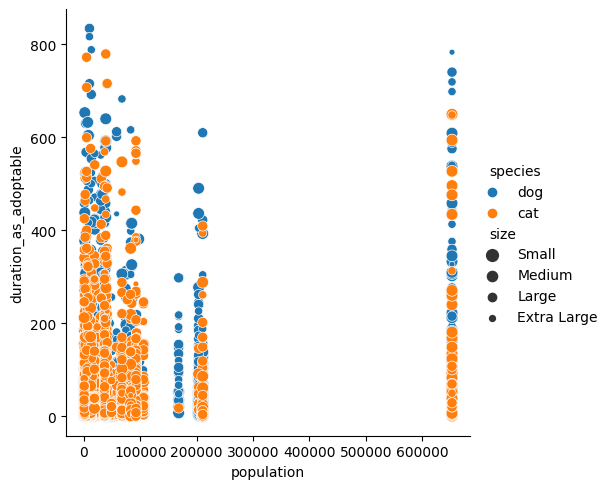

In [311]:
sns.relplot(x='population', y='duration_as_adoptable', data=df, hue='species', kind='scatter', size='size')

In [25]:
compare = df.pivot_table(index='species', values='duration_as_adoptable', aggfunc=np.mean)

In [26]:
compare

,duration_as_adoptable
species,
cat,32.05886
dog,41.93559


In [27]:
cats.corr()

,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_mixed,breed_unknown,hasimage,hasvideo,duration_as_adoptable,population
distance,1.00000,-0.20040,0.05138,0.04016,0.03904,-0.16631,-0.40720,nan,0.07713,0.04249,0.08323,0.33978
spayed_neutered,-0.20040,1.00000,0.06541,0.02830,0.01910,0.32441,0.08761,nan,-0.04734,0.05575,-0.00948,-0.06922
house_trained,0.05138,0.06541,1.00000,0.02981,0.05869,-0.00777,-0.12398,nan,0.15134,0.14627,0.09961,0.09863
declawed,0.04016,0.02830,0.02981,1.00000,0.03913,-0.00801,-0.01497,nan,-0.00003,-0.01844,0.04381,0.02451
special_needs,0.03904,0.01910,0.05869,0.03913,1.00000,-0.00945,-0.02466,nan,0.00468,-0.00105,0.18559,0.02098
shots_current,-0.16631,0.32441,-0.00777,-0.00801,-0.00945,1.00000,0.00637,nan,-0.01740,0.03521,-0.03460,-0.03601
breed_mixed,-0.40720,0.08761,-0.12398,-0.01497,-0.02466,0.00637,1.00000,nan,-0.09442,0.07719,-0.08657,-0.13856
breed_unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hasimage,0.07713,-0.04734,0.15134,-0.00003,0.00468,-0.01740,-0.09442,nan,1.00000,0.03520,0.06186,0.04167
hasvideo,0.04249,0.05575,0.14627,-0.01844,-0.00105,0.03521,0.07719,nan,0.03520,1.00000,0.00240,0.01534


In [28]:
cats_bools = cats.select_dtypes(include=['bool']).columns

In [29]:
cats[cats_bools] = cats[cats_bools].astype('int64')

In [30]:
cats.dtypes

age                       object
gender                    object
size                      object
coat                      object
distance                 float64
spayed_neutered            int64
house_trained              int64
declawed                   int64
special_needs              int64
shots_current              int64
breed_primary             object
breed_secondary           object
breed_mixed                int64
breed_unknown              int64
color_primary             object
color_secondary           object
color_tertiary            object
goodwith_children         object
goodwith_dogs             object
goodwith_cats             object
hasimage                   int64
hasvideo                   int64
duration_as_adoptable    float64
city                      object
population               float64
species                   object
dtype: object

In [31]:
cats_corr = cats.drop(columns='breed_unknown').corr()
cats_corr

,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_mixed,hasimage,hasvideo,duration_as_adoptable,population
distance,1.00000,-0.20040,0.05138,0.04016,0.03904,-0.16631,-0.40720,0.07713,0.04249,0.08323,0.33978
spayed_neutered,-0.20040,1.00000,0.06541,0.02830,0.01910,0.32441,0.08761,-0.04734,0.05575,-0.00948,-0.06922
house_trained,0.05138,0.06541,1.00000,0.02981,0.05869,-0.00777,-0.12398,0.15134,0.14627,0.09961,0.09863
declawed,0.04016,0.02830,0.02981,1.00000,0.03913,-0.00801,-0.01497,-0.00003,-0.01844,0.04381,0.02451
special_needs,0.03904,0.01910,0.05869,0.03913,1.00000,-0.00945,-0.02466,0.00468,-0.00105,0.18559,0.02098
shots_current,-0.16631,0.32441,-0.00777,-0.00801,-0.00945,1.00000,0.00637,-0.01740,0.03521,-0.03460,-0.03601
breed_mixed,-0.40720,0.08761,-0.12398,-0.01497,-0.02466,0.00637,1.00000,-0.09442,0.07719,-0.08657,-0.13856
hasimage,0.07713,-0.04734,0.15134,-0.00003,0.00468,-0.01740,-0.09442,1.00000,0.03520,0.06186,0.04167
hasvideo,0.04249,0.05575,0.14627,-0.01844,-0.00105,0.03521,0.07719,0.03520,1.00000,0.00240,0.01534
duration_as_adoptable,0.08323,-0.00948,0.09961,0.04381,0.18559,-0.03460,-0.08657,0.06186,0.00240,1.00000,0.09371


<AxesSubplot:>

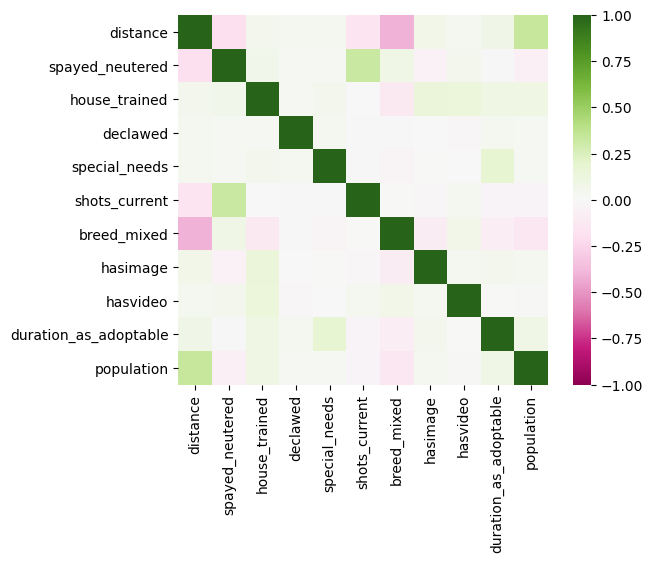

In [39]:
plt.style.use('default')

sns.heatmap(cats_corr, cmap="PiYG", vmin=-1, vmax=1, square=True)

In [318]:
cats_dummies = pd.get_dummies(cats.drop(['breed_primary', 'breed_secondary', 'breed_mixed', 'breed_unknown', 'color_primary', 'color_secondary', 'color_tertiary'], axis=1))

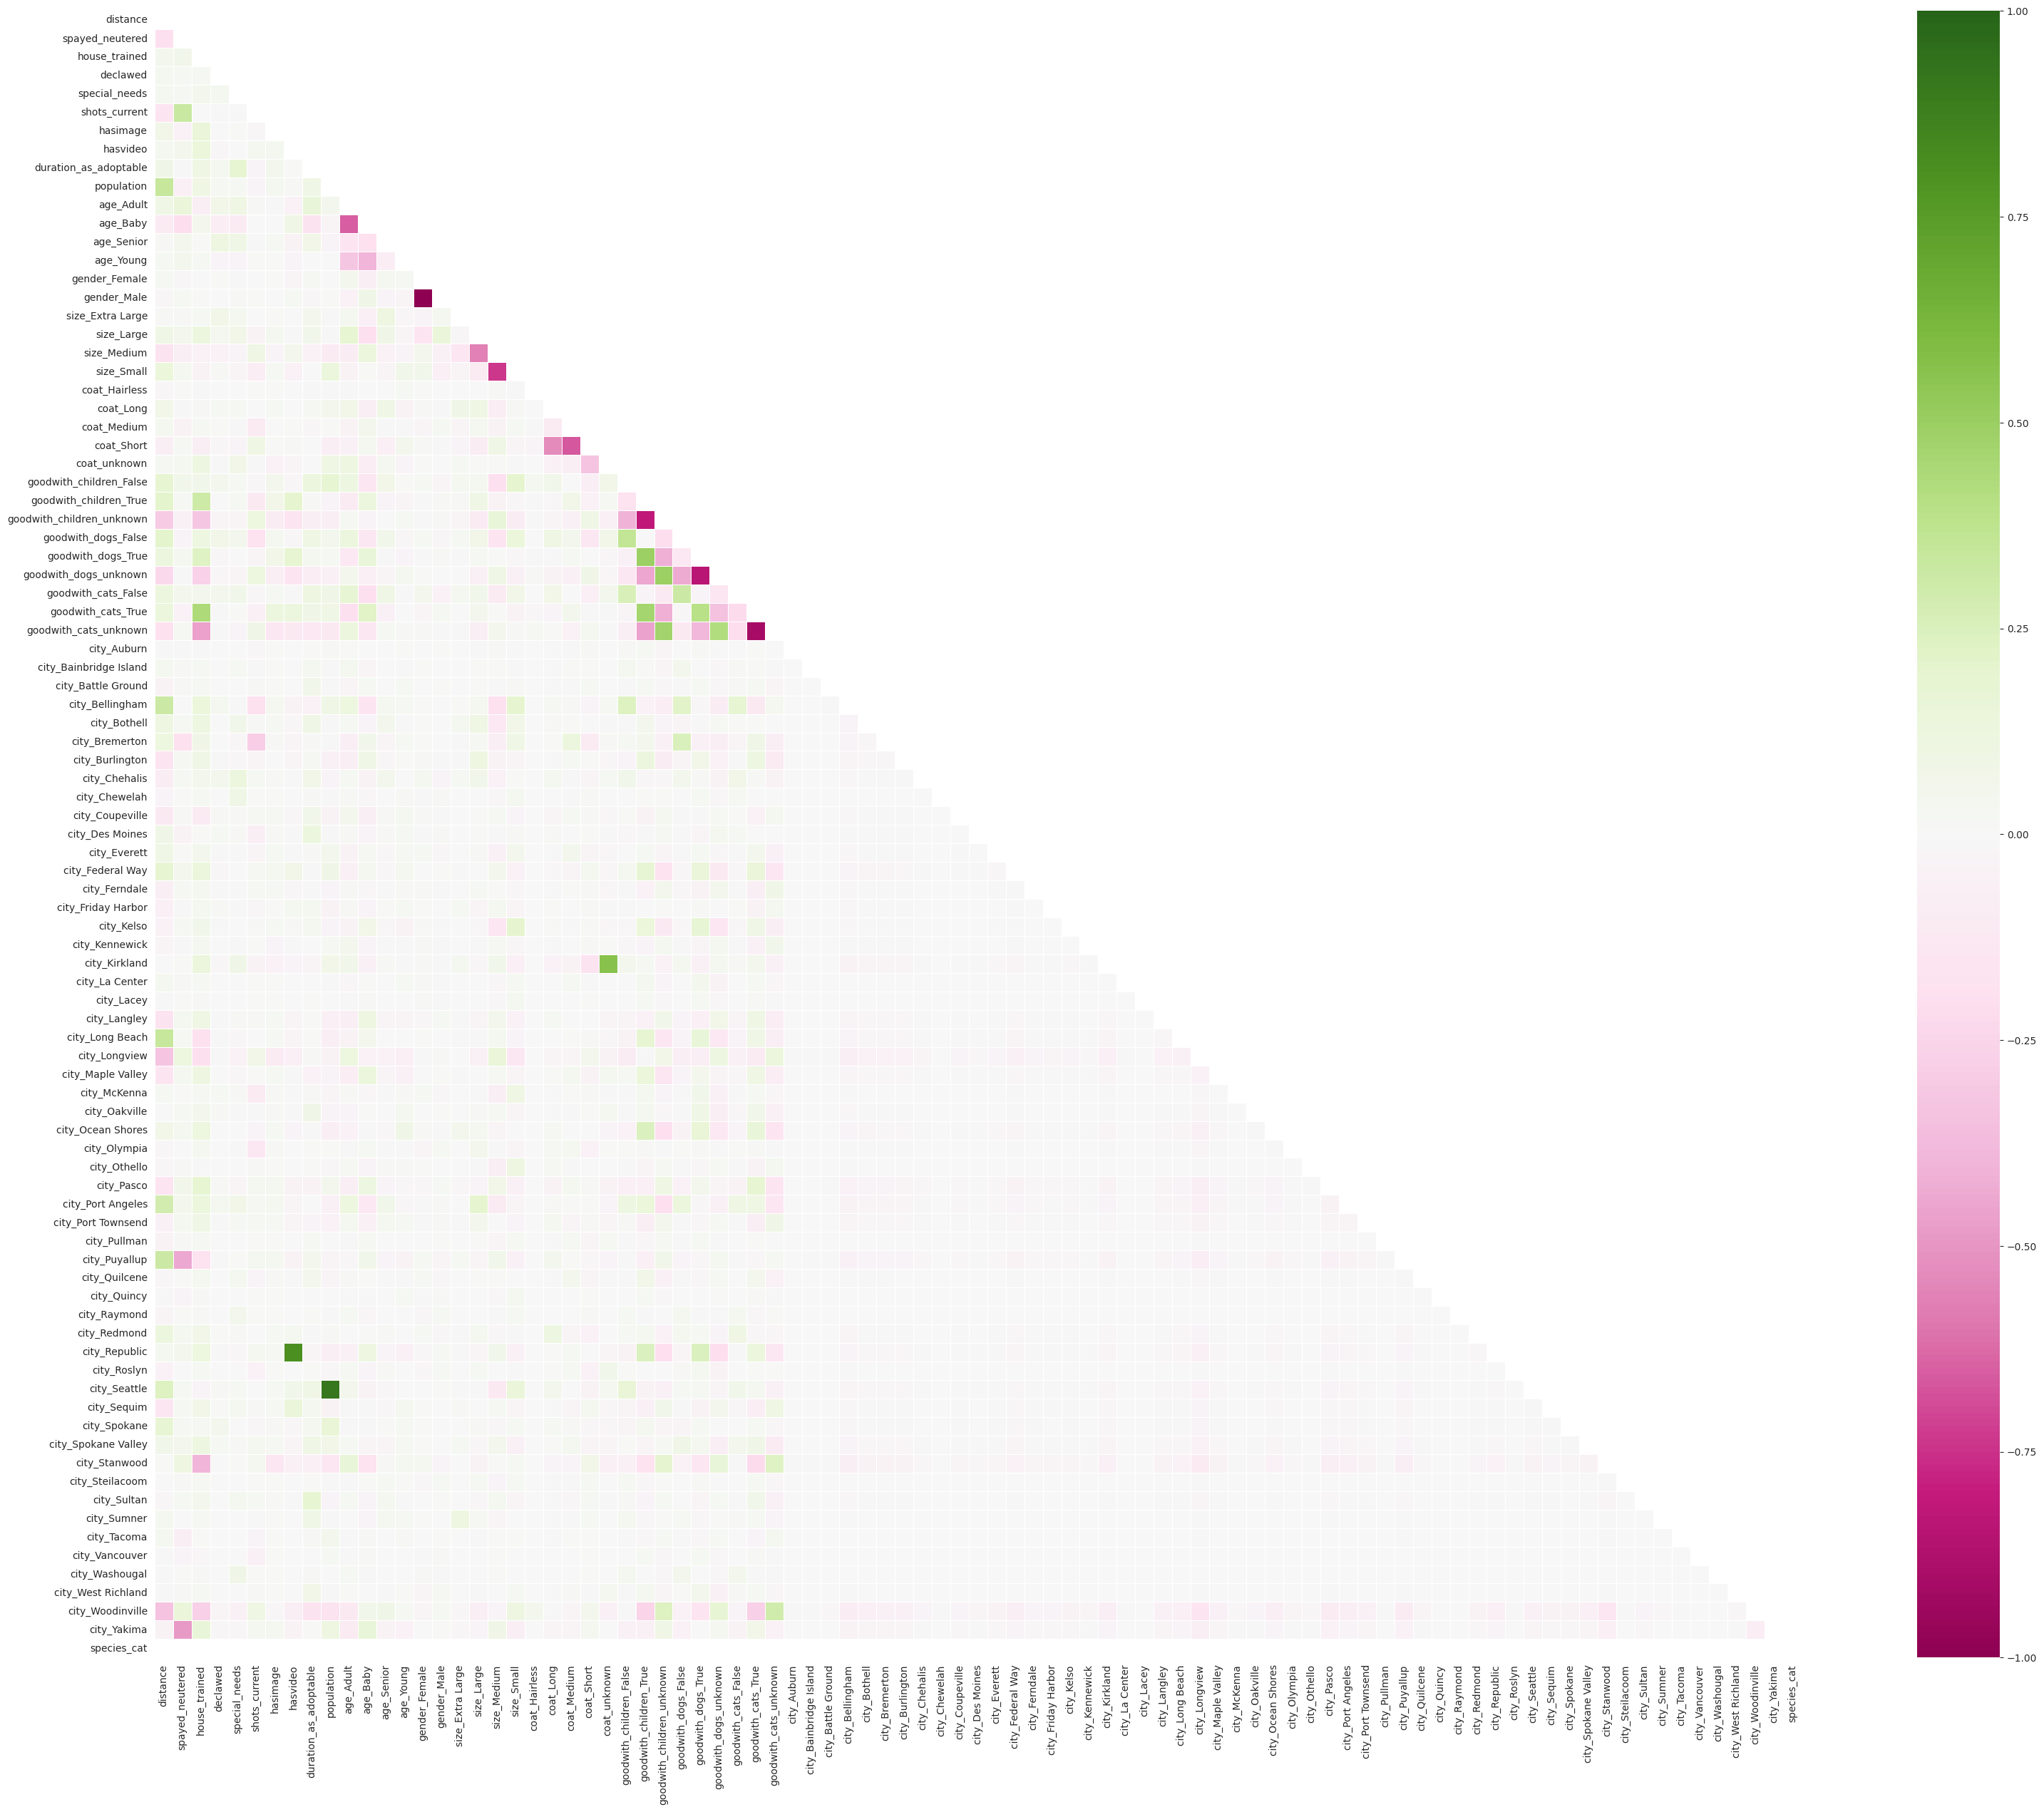

In [332]:
cats_dummies_corr = cats_dummies.corr()
mask = np.zeros_like(cats_dummies_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(42, 30))
    ax = sns.heatmap(cats_dummies_corr, mask=mask, vmin=-1, vmax=1, square=True, cmap="PiYG", linewidths=.5)

In [33]:
cats_corr_duration = cats_corr['duration_as_adoptable']
cats_corr_duration

distance                 0.08323
spayed_neutered         -0.00948
house_trained            0.09961
declawed                 0.04381
special_needs            0.18559
shots_current           -0.03460
breed_mixed             -0.08657
hasimage                 0.06186
hasvideo                 0.00240
duration_as_adoptable    1.00000
population               0.09371
Name: duration_as_adoptable, dtype: float64

In [34]:
dogs_corr = dogs.corr()
dogs_corr

,distance,spayed_neutered,house_trained,special_needs,shots_current,breed_mixed,hasimage,hasvideo,duration_as_adoptable,population
distance,1.00000,-0.16287,-0.01848,0.06677,-0.12268,-0.06844,0.01038,0.03551,0.05989,0.32505
spayed_neutered,-0.16287,1.00000,0.35526,0.04031,0.36364,-0.06517,-0.00838,0.02448,0.06999,0.04708
house_trained,-0.01848,0.35526,1.00000,0.05466,0.14377,-0.16266,0.05116,0.08654,0.14696,0.02849
special_needs,0.06677,0.04031,0.05466,1.00000,-0.00301,-0.07589,0.00185,-0.00565,0.10731,0.02897
shots_current,-0.12268,0.36364,0.14377,-0.00301,1.00000,0.04730,0.01621,0.01427,-0.03032,-0.04616
breed_mixed,-0.06844,-0.06517,-0.16266,-0.07589,0.04730,1.00000,-0.01420,0.01734,-0.05014,-0.07929
hasimage,0.01038,-0.00838,0.05116,0.00185,0.01621,-0.01420,1.00000,0.01911,0.04309,0.02270
hasvideo,0.03551,0.02448,0.08654,-0.00565,0.01427,0.01734,0.01911,1.00000,0.06141,0.06786
duration_as_adoptable,0.05989,0.06999,0.14696,0.10731,-0.03032,-0.05014,0.04309,0.06141,1.00000,0.13036
population,0.32505,0.04708,0.02849,0.02897,-0.04616,-0.07929,0.02270,0.06786,0.13036,1.00000


In [35]:
dogs_corr_duration = dogs_corr['duration_as_adoptable']
dogs_corr_duration

distance                 0.05989
spayed_neutered          0.06999
house_trained            0.14696
special_needs            0.10731
shots_current           -0.03032
breed_mixed             -0.05014
hasimage                 0.04309
hasvideo                 0.06141
duration_as_adoptable    1.00000
population               0.13036
Name: duration_as_adoptable, dtype: float64

In [36]:
corr_compare = pd.DataFrame({'dogs': dogs_corr_duration, 'cats': cats_corr_duration}).drop('duration_as_adoptable', axis=0)
corr_compare

,dogs,cats
breed_mixed,-0.05014,-0.08657
declawed,nan,0.04381
distance,0.05989,0.08323
hasimage,0.04309,0.06186
hasvideo,0.06141,0.00240
house_trained,0.14696,0.09961
population,0.13036,0.09371
shots_current,-0.03032,-0.03460
spayed_neutered,0.06999,-0.00948
special_needs,0.10731,0.18559
